<a href="https://colab.research.google.com/github/Sachin1801/AI_Practice/blob/main/sgd_sinusoidal_dataset_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGD Example for Linear Regression

In [6]:
!pip install git+https://github.com/ctgk/PRML.git

import seaborn as sns
import math

# Apply the default theme
sns.set_theme()


  Cloning https://github.com/ctgk/PRML.git to /tmp/pip-req-build-ynxv29jy
  Running command git clone --filter=blob:none --quiet https://github.com/ctgk/PRML.git /tmp/pip-req-build-ynxv29jy
  Resolved https://github.com/ctgk/PRML.git to commit 0aba5c8b12adf99d53f3471b7cf4fa117d64acc8
  Preparing metadata (setup.py) ... done


In [7]:
import prml
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression,
)


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split


def create_toy_data(func, sample_size, std, domain=[0, 1]):
    rng = np.random.default_rng()
    x = np.linspace(domain[0], domain[1], sample_size)
    # x = rng.uniform(0, 1, sample_size)
    np.random.shuffle(x)

    y = func(x) + rng.normal(scale=std, size=x.shape)
    return x, y


def sinusoidal(x):
    return np.sin(2 * np.pi * x)


m = 20
x, y = create_toy_data(sinusoidal, m, 0.25)

# Reshape x to work with sklearn (needed if x is a 1D array)
x = x.reshape(-1, 1)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# Print the shapes of the splits
print("Training set size:", x_train.shape, y_train.shape)
print("Test set size:", x_test.shape, y_test.shape)


Training set size: (14, 1) (14,)
Test set size: (6, 1) (6,)


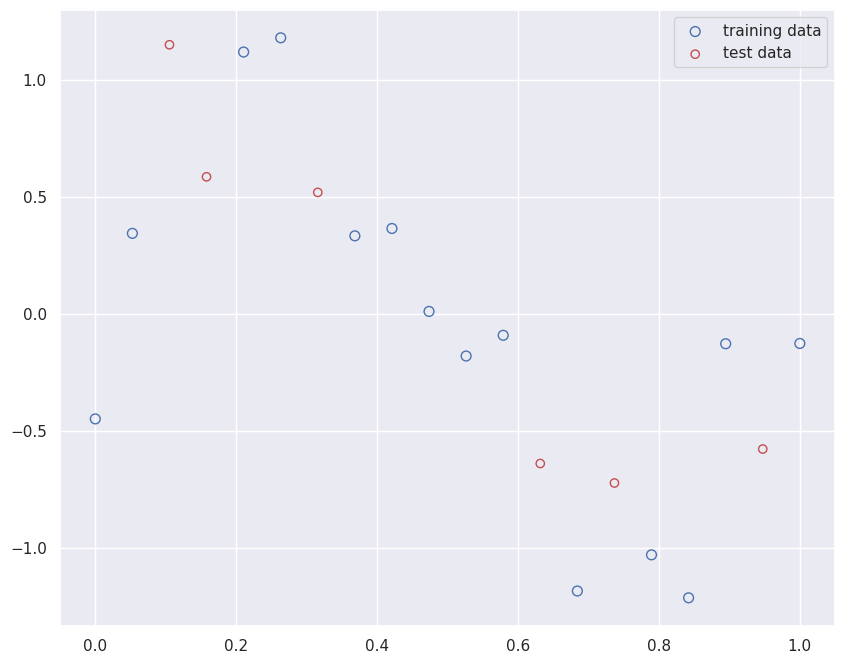

In [9]:
plt.figure(figsize=[10, 8])
plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
plt.scatter(x_test, y_test, facecolor="none", edgecolor="r", label="test data")
plt.legend()
plt.show()

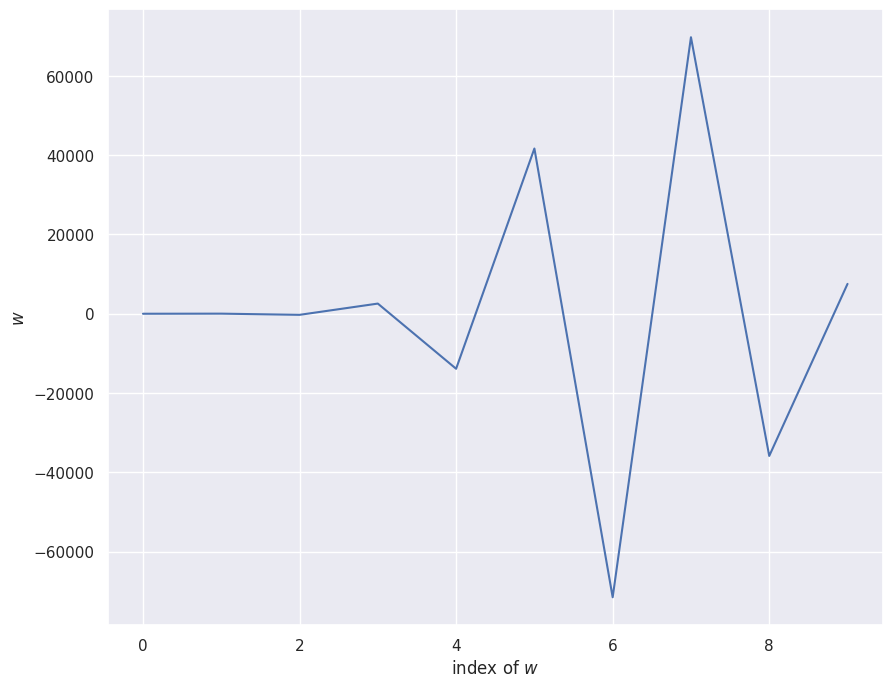

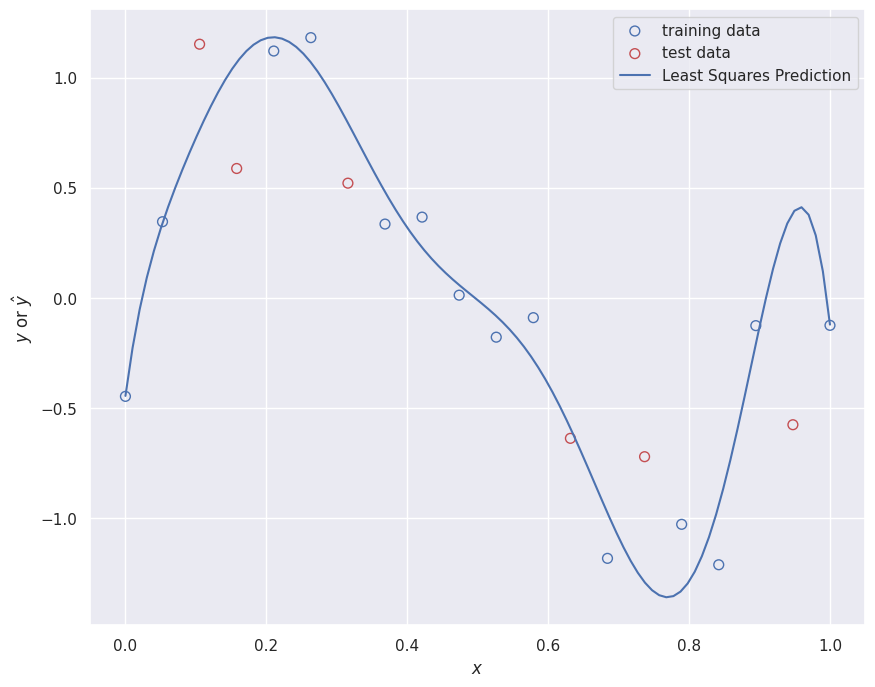

In [10]:
M = 9

feature = PolynomialFeature(M)

X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=[10, 8])
plt.plot(model.w)
plt.xlabel("index of $w$")
plt.ylabel("$w$")


plt.figure(figsize=[10, 8])

# training data
plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
# test data
plt.scatter(x_test, y_test, facecolor="none", edgecolor="r", s=50, label="test data")

# M=9 polynomial regression hypothesis
x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range = feature.transform(x_range)
y_hat_range, y_hat_range_std = model.predict(X_range, return_std=True)

plt.plot(x_range, y_hat_range, label="Least Squares Prediction")

plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$ or $\hat{y}$")

plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import test

import numpy as np
import matplotlib.pyplot as plt


# SGD Loop with polynomial features and mini-batch support
def sgd_loop(
    X_train,
    y_train,
    X_test,
    y_test,
    w,
    learning_rate,
    epochs,
    lambda_reg,
    n_samples,
    batch_size=1,
):
    # Arrays to store loss values for visualization
    losses = []
    test_losses = []

    # SGD Loop
    for epoch in range(epochs):
        for i in range(0, n_samples, batch_size):  # Iterate in mini-batches
            # Select a mini-batch of `batch_size`
            batch_indices = np.random.choice(n_samples, batch_size, replace=False)
            xi = X_train[batch_indices]
            yi = y_train[batch_indices]

            # Prediction
            y_pred = np.dot(xi, w)

            # Compute error
            error = y_pred - yi

            # Compute gradients (Mean of batch gradients)
            dw = (2 / batch_size) * (xi.T @ error).flatten() + 2 * lambda_reg * w

            # Update weights
            w -= learning_rate * dw

        # Compute training loss
        y_hat_train = X_train @ w
        loss = np.mean((y_hat_train - y_train) ** 2) + lambda_reg * np.sum(w**2)
        losses.append(loss)

        # Compute test loss
        y_hat_test = X_test @ w
        test_loss = np.mean((y_hat_test - y_test) ** 2) + lambda_reg * np.sum(w**2)
        test_losses.append(test_loss)

    # Plot loss vs epochs
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), losses, label="Training Loss", color="blue")
    plt.plot(range(epochs), test_losses, label="Test Loss", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Test Loss vs Epochs")
    plt.legend()

    # Start of plotting regression curve
    plt.subplot(1, 2, 2)
    x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

    # computation
    hypothesis = np.zeros_like(x_range)
    for i in range(len(w)):
        hypothesis += w[i] * (x_range**i)  # Add each term: w_i * x^i

    # Plot training and testing data points
    plt.scatter(x_train, y_train, color="blue", label="Training Data")
    plt.scatter(x_test, y_test, color="red", label="Test Data")

    # plot our regression curve
    plt.plot(x_range, hypothesis, color="green", label="Regularized Hypothesis")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Regularized 9-degree Polynomial Regression Function")
    plt.legend()

    plt.tight_layout()
    plt.show()

    min_loss = min(losses)
    min_index = losses.index(min_loss)
    min_test_loss = min(test_losses)
    min_test_index = test_losses.index(min_test_loss)

    # Print final parameters
    print("Final weights:", w.flatten())
    print(f"Smallest Loss: {min_loss} loss at index {min_index}")
    print(f"Smallest Test Loss: {min_test_loss} loss at index {min_test_index}")

    return min(test_losses)


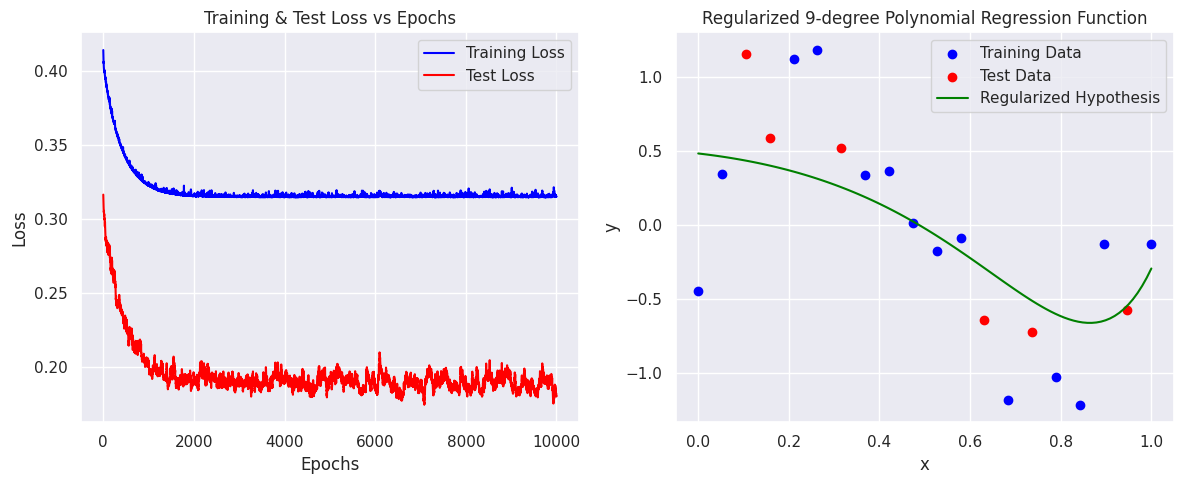

Final weights: [ 0.48300674 -0.35498272 -0.91587499 -0.68250666 -0.34076742 -0.04499698
  0.18272044  0.35064087  0.47167623  0.55735002]
Smallest Loss: 0.31448195908232257 loss at index 9388
Smallest Test Loss: 0.1744249925759766 loss at index 7082


In [12]:
n_features = X_train.shape[1]  # Number of polynomial features

# Replace this vector with the optimal trial vector
w = np.array(
    [
        0.3821733,
        0.3096256,
        -1.87535451,
        -0.41147161,
        0.48204058,
        -0.47616227,
        -0.91596271,
        0.33230879,
        0.92623104,
        1.34749729,
    ]
)

test_loss = sgd_loop(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    w=w,
    learning_rate=0.01,
    epochs=10000,
    lambda_reg=0.02,
    n_samples=len(y_train),
    batch_size=5,
)


In [14]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.1 MB/s eta 0:00:00


In [15]:
import optuna


def objective(trial):
    # Sample lambda_reg from Optuna (log-uniform for better scaling)
    lambda_reg = trial.suggest_loguniform(
        "lambda_reg", 1e-4, 1.0
    )  # Define the search space

    # batch_size = trial.suggest_uniform(
    #     "batch_size", 1, 10
    # )  # Define the search space

    # Initialize weights
    w = np.random.randn(10)

    # fix batch size to the size of the training set
    batch_size = len(y_train)

    # Run SGD
    min_test_loss = sgd_loop(
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        w=w,
        learning_rate=0.01,
        epochs=10000,
        lambda_reg=lambda_reg,
        n_samples=len(y_train),
        batch_size=batch_size,
    )

    return min_test_loss


[I 2025-03-13 19:32:09,717] A new study created in memory with name: no-name-0dc919a5-2815-4300-b523-7f164422d7d3
<ipython-input-15-479e1c1fdfca>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_reg = trial.suggest_loguniform(


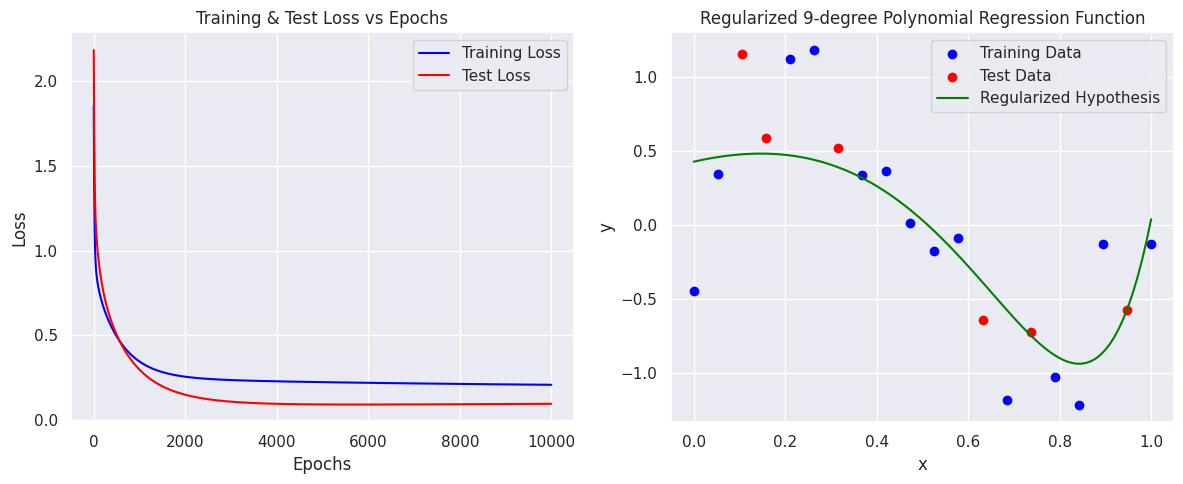

[I 2025-03-13 19:32:11,643] Trial 0 finished with value: 0.08926929142010918 and parameters: {'lambda_reg': 0.00017892008815423595}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.42710585  0.70126871 -1.93692695 -1.83747851 -1.01298896  0.64010093
  0.16470307  0.03279175  1.92085888  0.93983351]
Smallest Loss: 0.20597250583528626 loss at index 9999
Smallest Test Loss: 0.08926929142010918 loss at index 5758


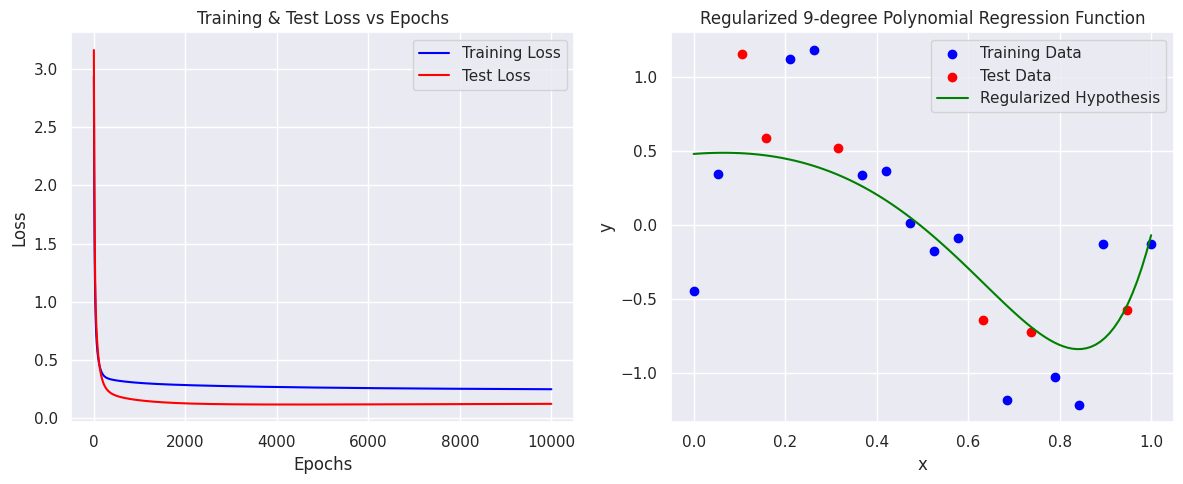

[I 2025-03-13 19:32:13,983] Trial 1 finished with value: 0.11855502209117466 and parameters: {'lambda_reg': 0.0034117806836220775}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.47984594  0.23212584 -1.59753298 -1.69195136 -0.18754006 -0.43577077
  0.95836757  1.19540355 -0.01330499  0.99158996]
Smallest Loss: 0.2498805970046898 loss at index 9999
Smallest Test Loss: 0.11855502209117466 loss at index 4339


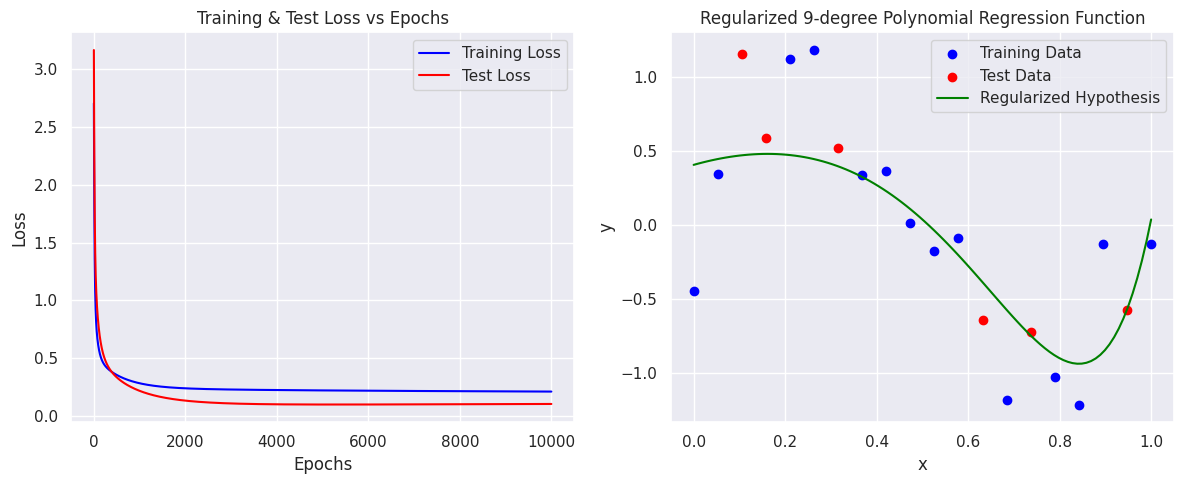

[I 2025-03-13 19:32:17,683] Trial 2 finished with value: 0.0963883294125456 and parameters: {'lambda_reg': 0.0005977207123964871}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.4060389   0.87070579 -2.27889645 -1.44552596 -1.45386173  0.36566294
  1.24068381 -0.04985729  1.11468152  1.26767361]
Smallest Loss: 0.20857726872378535 loss at index 9999
Smallest Test Loss: 0.0963883294125456 loss at index 5272


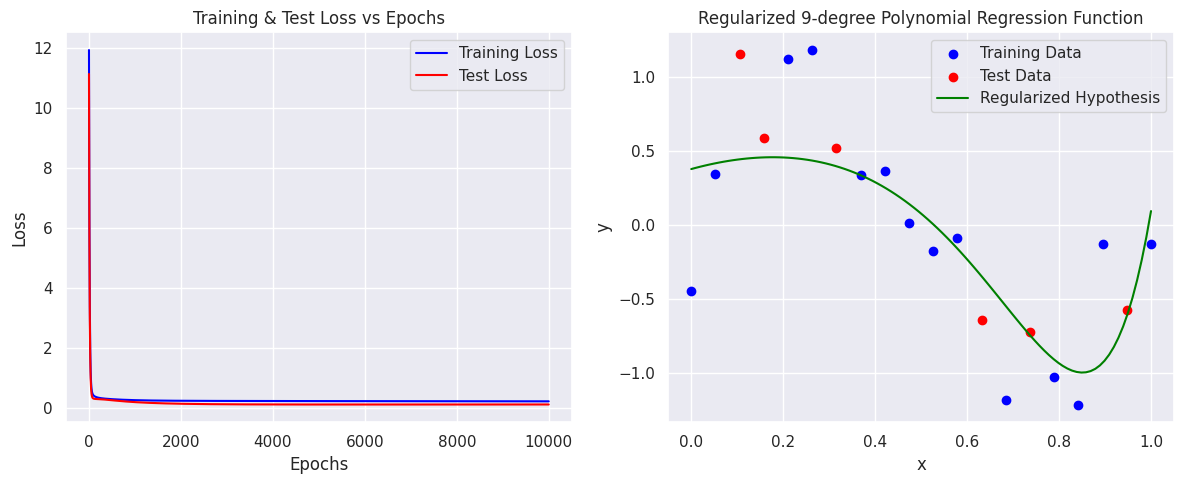

[I 2025-03-13 19:32:19,942] Trial 3 finished with value: 0.10654839690851572 and parameters: {'lambda_reg': 0.00028516213955056093}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.37775913  0.85190323 -2.01260874 -1.31466546 -0.34510507 -1.60173655
 -0.2203605   0.74262245  1.50344321  2.11278765]
Smallest Loss: 0.21307178459379242 loss at index 9999
Smallest Test Loss: 0.10654839690851572 loss at index 5855


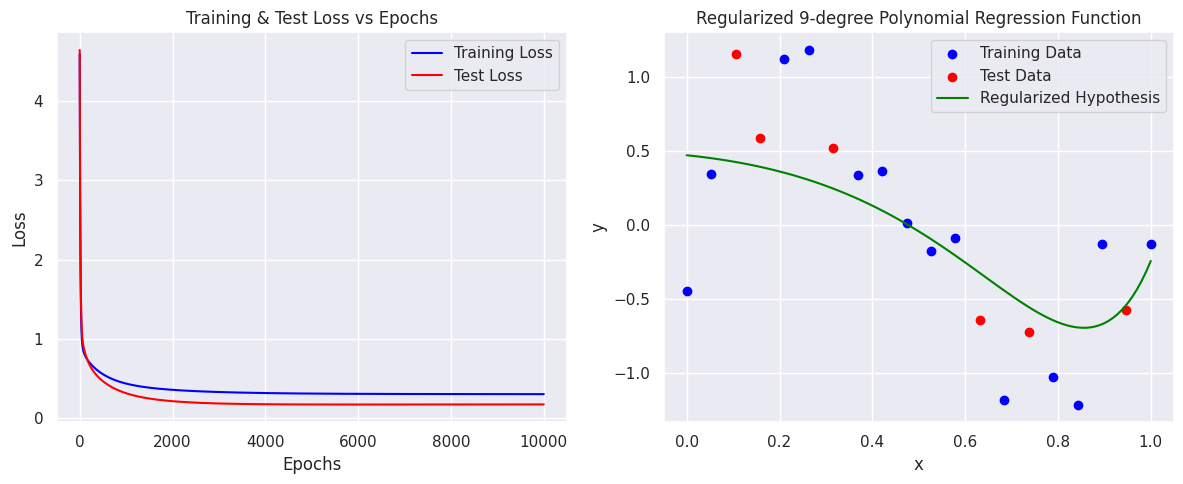

[I 2025-03-13 19:32:21,827] Trial 4 finished with value: 0.17168717153492075 and parameters: {'lambda_reg': 0.015527108139304923}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.4709678  -0.3224623  -0.9538718  -0.7715314  -0.44010293 -0.0438606
  0.30472079  0.39164707  0.52005532  0.60153767]
Smallest Loss: 0.3028611550261439 loss at index 9999
Smallest Test Loss: 0.17168717153492075 loss at index 6065


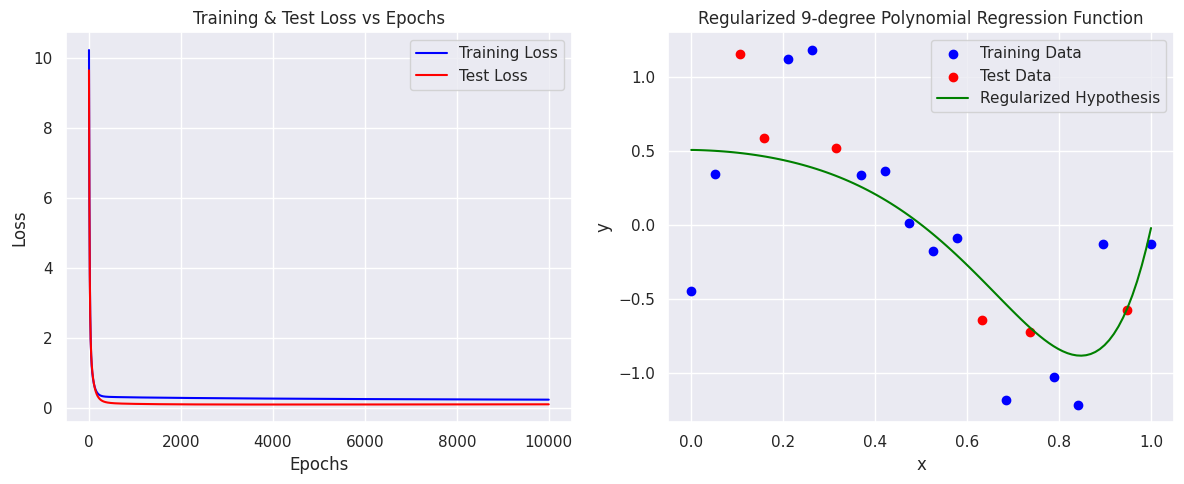

[I 2025-03-13 19:32:24,140] Trial 5 finished with value: 0.10625437772010536 and parameters: {'lambda_reg': 0.001681826304291442}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.50686607 -0.04700269 -1.33327026 -0.41190804 -1.30798851 -0.90614036
 -0.20315887  1.01139869  2.09931475  0.57142108]
Smallest Loss: 0.24519162525518534 loss at index 9999
Smallest Test Loss: 0.10625437772010536 loss at index 4027


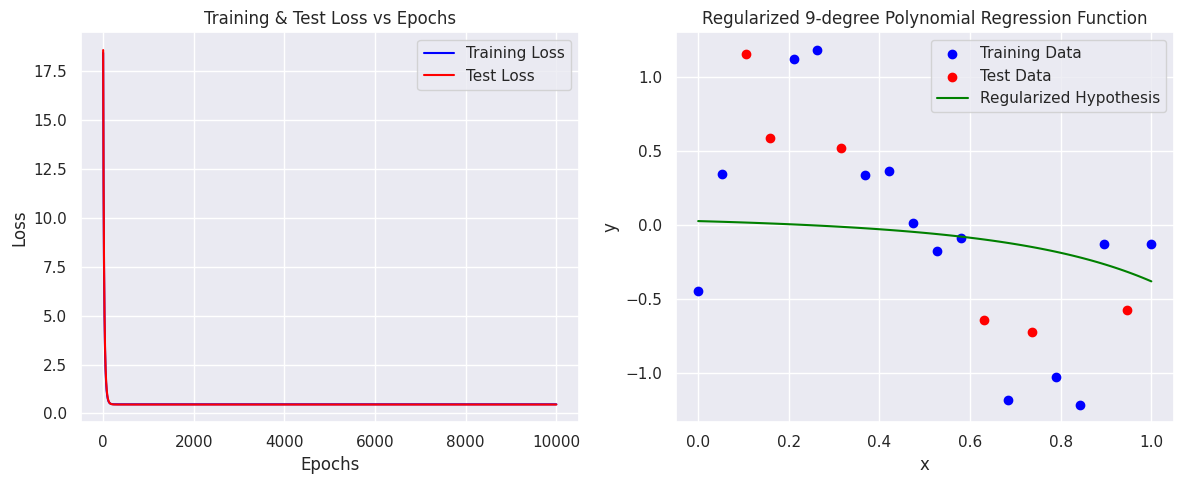

[I 2025-03-13 19:32:25,366] Trial 6 finished with value: 0.45657116443091394 and parameters: {'lambda_reg': 0.8804610688920176}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.02641923 -0.08372592 -0.09221735 -0.0754902  -0.05669246 -0.04059479
 -0.02769781 -0.01755937 -0.00961936 -0.003391  ]
Smallest Loss: 0.46764989378680677 loss at index 1194
Smallest Test Loss: 0.45657116443091394 loss at index 1947


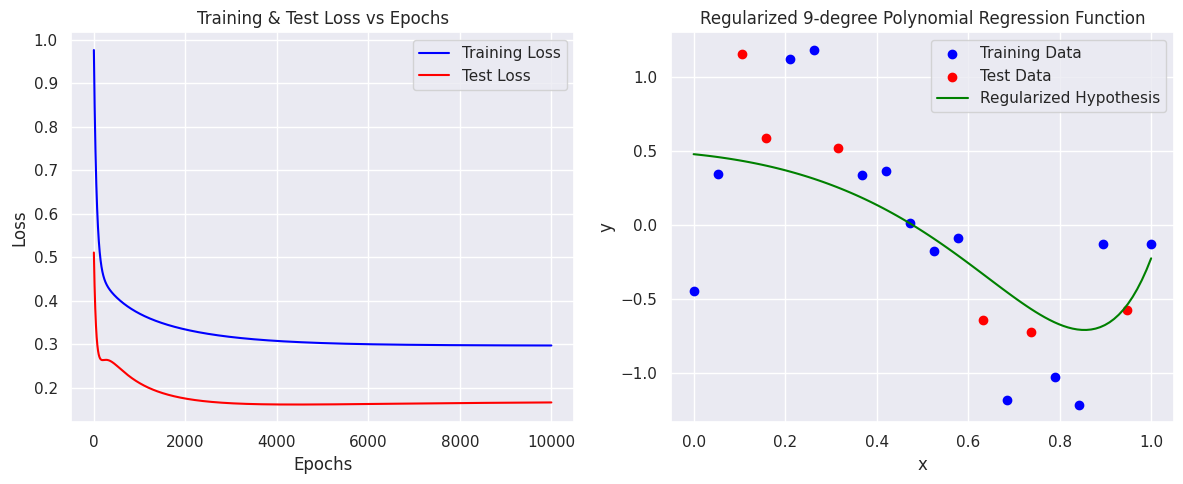

[I 2025-03-13 19:32:26,365] Trial 7 finished with value: 0.16209085897514477 and parameters: {'lambda_reg': 0.013861420489620966}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.4781689  -0.3121842  -0.96646366 -0.85863007 -0.36784982 -0.04573822
  0.2121172   0.39210299  0.55937542  0.68403715]
Smallest Loss: 0.29770313428392126 loss at index 9999
Smallest Test Loss: 0.16209085897514477 loss at index 4413


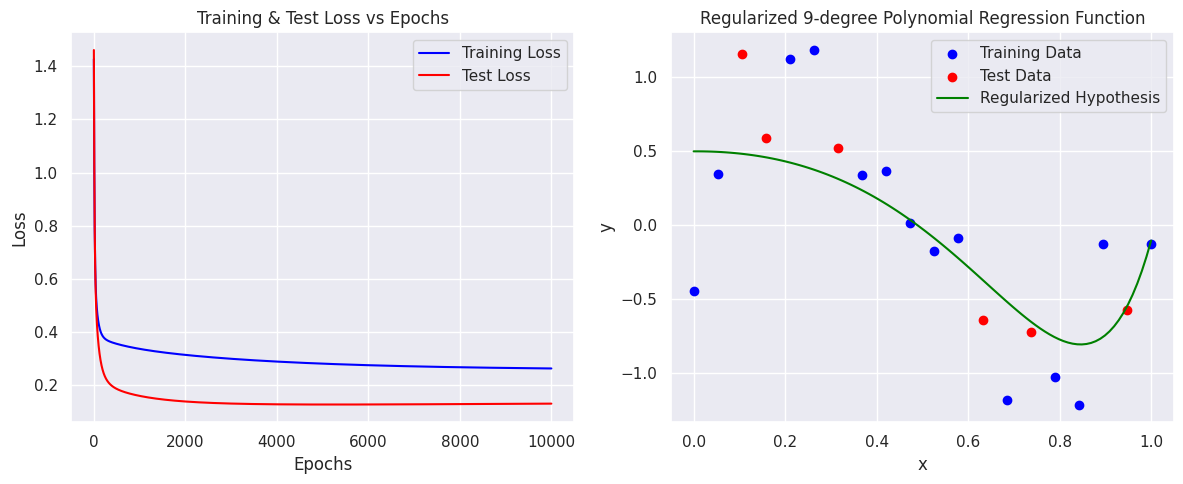

[I 2025-03-13 19:32:27,551] Trial 8 finished with value: 0.12830411638666384 and parameters: {'lambda_reg': 0.005174816720493919}. Best is trial 0 with value: 0.08926929142010918.


Final weights: [ 0.49735783  0.01667231 -1.51533563 -1.28464403 -0.01956487 -0.04465322
  0.33885263 -0.17478497  1.03472179  1.04630587]
Smallest Loss: 0.2638625421990999 loss at index 9999
Smallest Test Loss: 0.12830411638666384 loss at index 5219


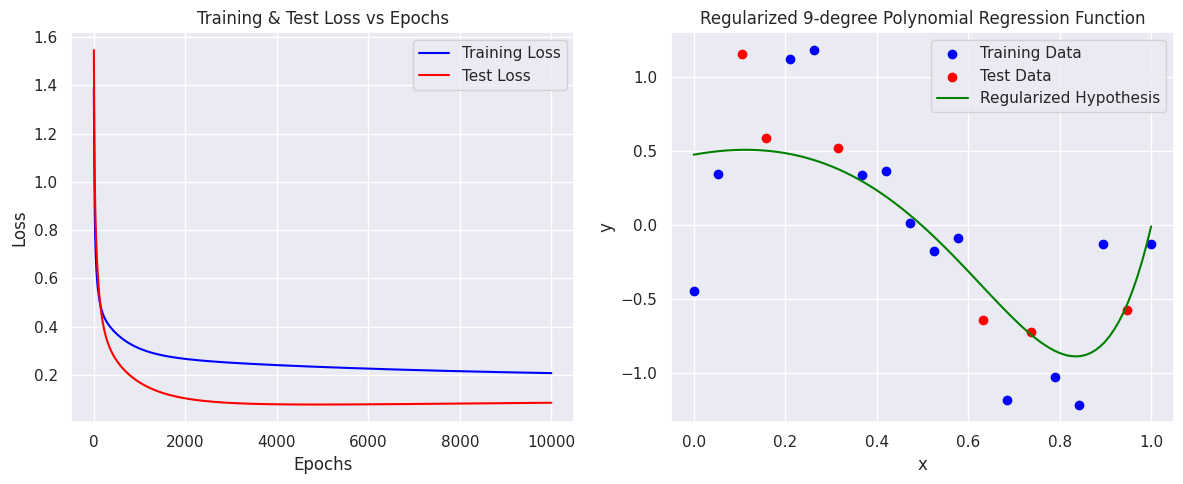

[I 2025-03-13 19:32:29,062] Trial 9 finished with value: 0.07762151042522195 and parameters: {'lambda_reg': 0.00022820419134217192}. Best is trial 9 with value: 0.07762151042522195.


Final weights: [ 0.4746023   0.56118132 -2.17747583 -1.67518866 -0.66736145  0.18548022
  1.17809273  0.56356899  1.22986443  0.31766925]
Smallest Loss: 0.20772753182191614 loss at index 9999
Smallest Test Loss: 0.07762151042522195 loss at index 4875


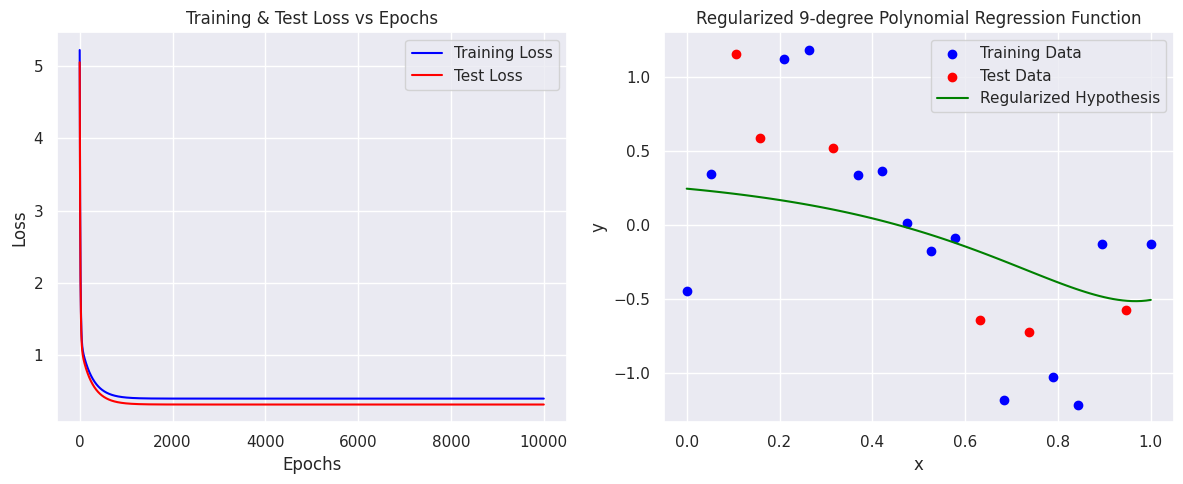

[I 2025-03-13 19:32:30,277] Trial 10 finished with value: 0.31225146183452224 and parameters: {'lambda_reg': 0.10092117987947899}. Best is trial 9 with value: 0.07762151042522195.


Final weights: [ 0.24531725 -0.29493641 -0.37813933 -0.27640001 -0.15715012 -0.05562207
  0.02433521  0.08578969  0.132666    0.16835621]
Smallest Loss: 0.39433330724975457 loss at index 9365
Smallest Test Loss: 0.31225146183452224 loss at index 9999


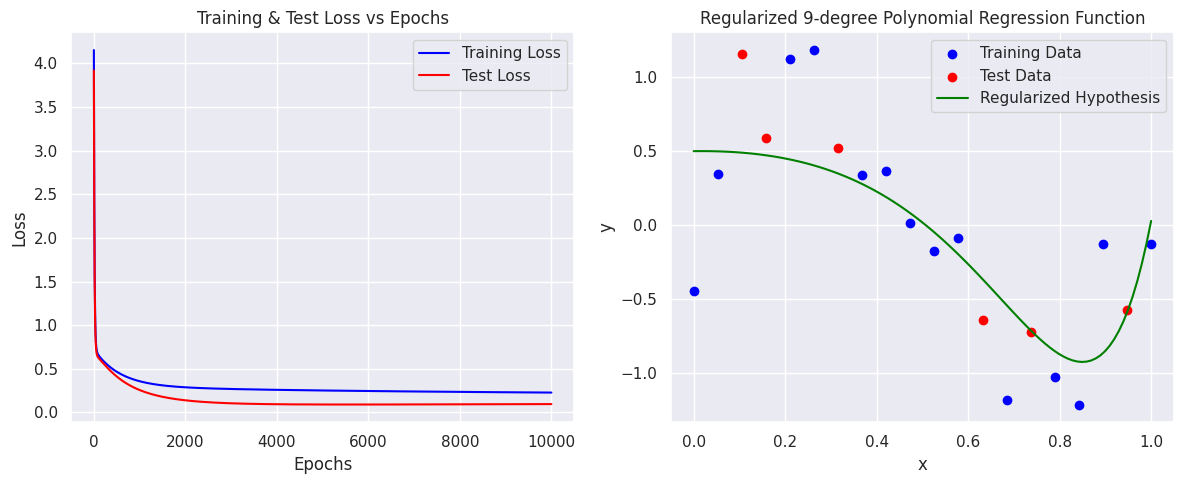

[I 2025-03-13 19:32:31,636] Trial 11 finished with value: 0.09002656101487003 and parameters: {'lambda_reg': 0.0001135239329388651}. Best is trial 9 with value: 0.07762151042522195.


Final weights: [ 0.49855311  0.0408779  -1.16190187 -1.14070052 -1.34942328  0.37668183
  0.40431595 -1.99297435  2.39113432  1.96092764]
Smallest Loss: 0.22709103873456174 loss at index 9999
Smallest Test Loss: 0.09002656101487003 loss at index 5574


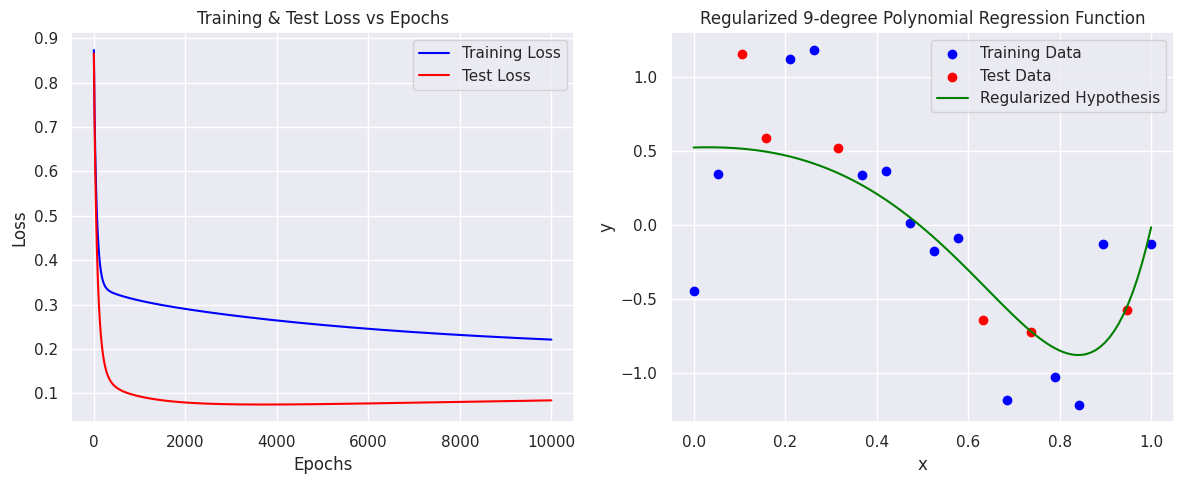

[I 2025-03-13 19:32:32,635] Trial 12 finished with value: 0.07513833549864254 and parameters: {'lambda_reg': 0.00010613346806713644}. Best is trial 12 with value: 0.07513833549864254.


Final weights: [ 0.52322332  0.09087444 -1.31102926 -2.54815987  0.9944038  -0.14536461
 -0.7319397   1.13735416  0.85216056  1.12245773]
Smallest Loss: 0.22128768251115066 loss at index 9999
Smallest Test Loss: 0.07513833549864254 loss at index 3716


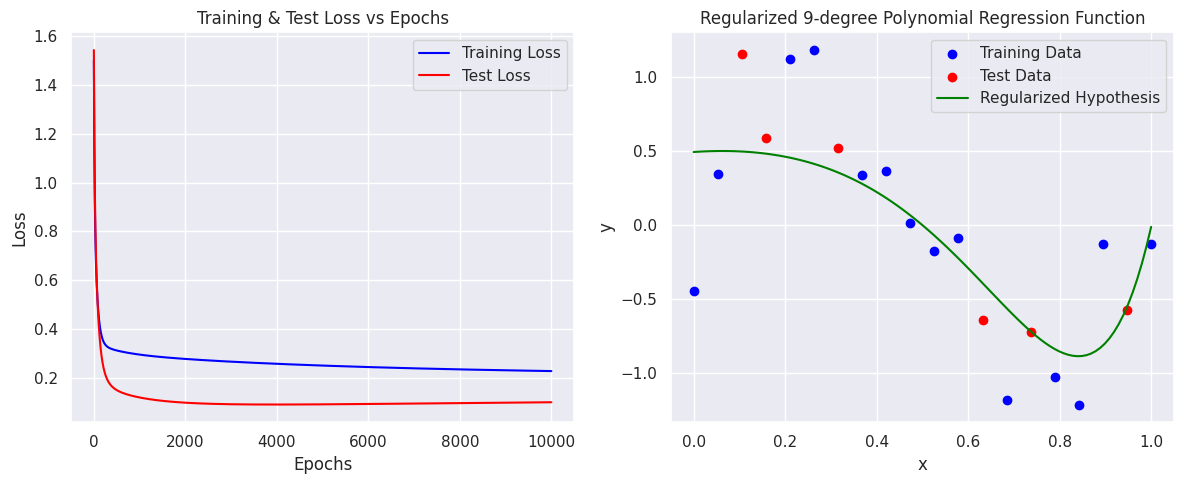

[I 2025-03-13 19:32:33,611] Trial 13 finished with value: 0.08962908440353093 and parameters: {'lambda_reg': 0.0008342968825429453}. Best is trial 12 with value: 0.07513833549864254.


Final weights: [ 0.49284259  0.21073897 -1.5598234  -1.17680179 -1.29929216 -0.24116573
  1.18492753 -0.17236031  2.37282607  0.17510772]
Smallest Loss: 0.226924667001445 loss at index 9999
Smallest Test Loss: 0.08962908440353093 loss at index 3953


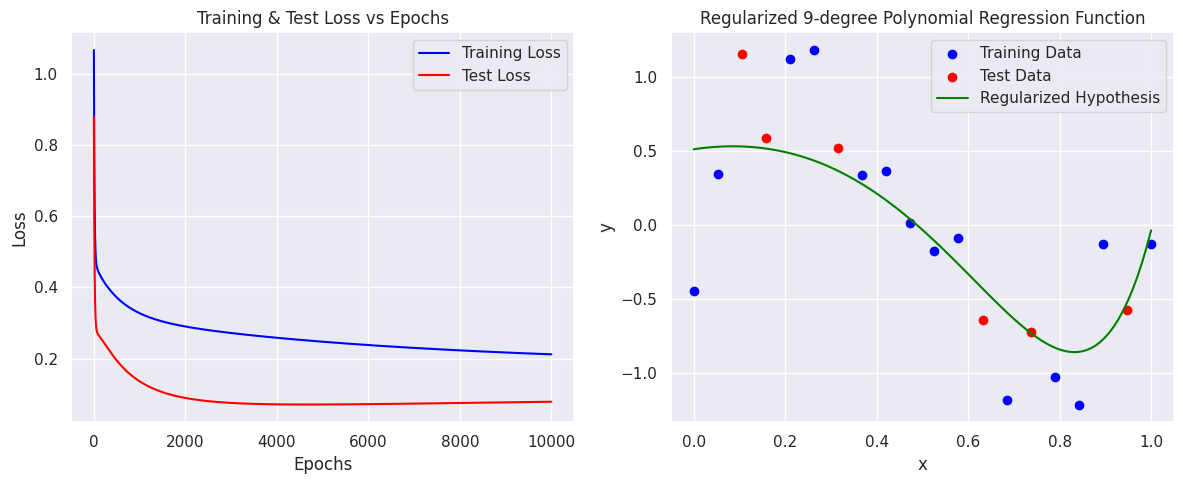

[I 2025-03-13 19:32:34,597] Trial 14 finished with value: 0.07102733178874752 and parameters: {'lambda_reg': 0.00011475258018316101}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.51149449  0.45556318 -2.48963117 -1.20738967 -0.73289695  0.62593617
  1.83618501 -1.12512992  1.91274473  0.17642371]
Smallest Loss: 0.212060178147755 loss at index 9999
Smallest Test Loss: 0.07102733178874752 loss at index 4684


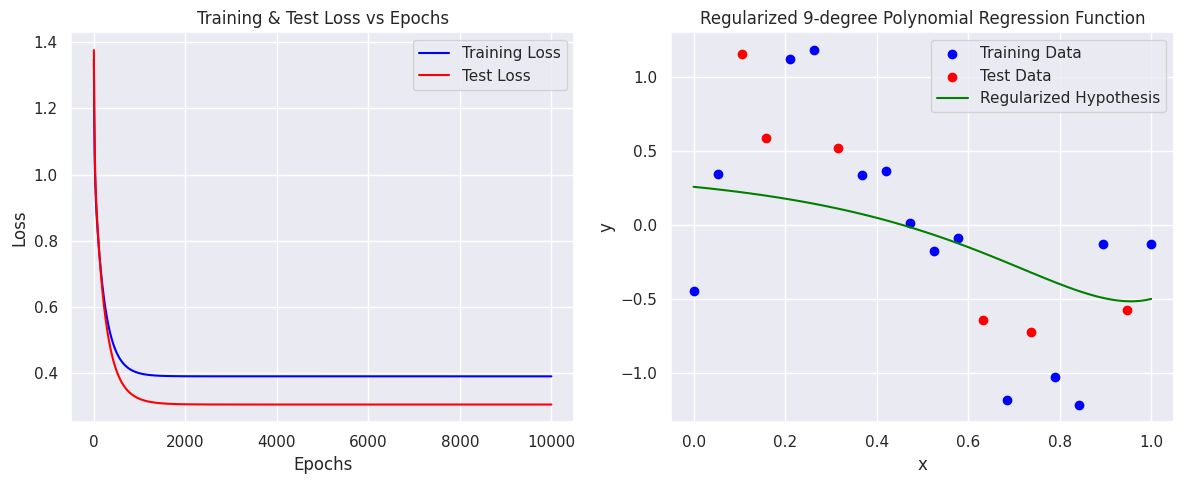

[I 2025-03-13 19:32:35,576] Trial 15 finished with value: 0.30519888142618273 and parameters: {'lambda_reg': 0.09257020032839022}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.25781747 -0.30659697 -0.39846307 -0.29043853 -0.16315922 -0.05475161
  0.03056666  0.09606525  0.14595064  0.18386211]
Smallest Loss: 0.3903865206747486 loss at index 9664
Smallest Test Loss: 0.30519888142618273 loss at index 9999


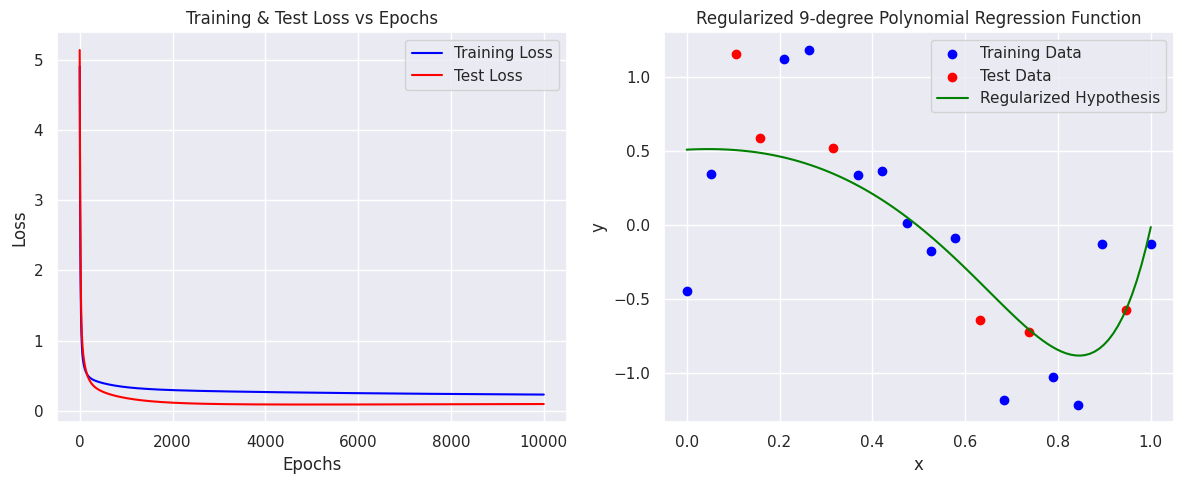

[I 2025-03-13 19:32:36,551] Trial 16 finished with value: 0.09013659489597908 and parameters: {'lambda_reg': 0.0007006675181344273}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.50875998  0.1600416  -1.58850233 -1.87574283  0.38910623  0.2189496
 -0.33221553  0.56347858 -0.78457392  2.7265464 ]
Smallest Loss: 0.2319283262244345 loss at index 9999
Smallest Test Loss: 0.09013659489597908 loss at index 4941


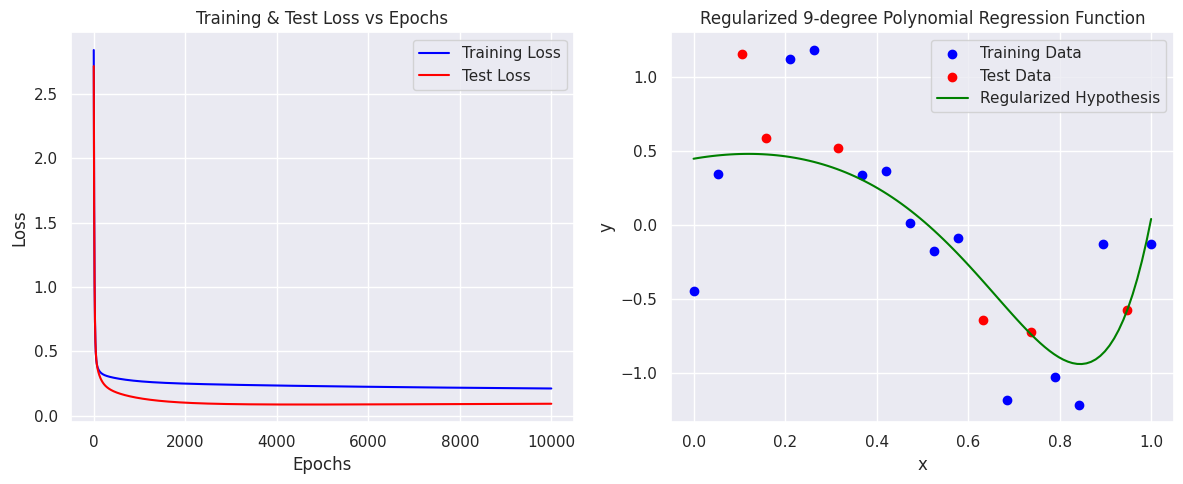

[I 2025-03-13 19:32:37,550] Trial 17 finished with value: 0.08855424038207296 and parameters: {'lambda_reg': 0.00011395412202529219}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.44742805  0.53091681 -2.0211642  -0.96157364 -0.44246145 -1.04145683
 -1.34564978  1.89028429  2.86439772  0.12007481]
Smallest Loss: 0.21299239899718278 loss at index 9999
Smallest Test Loss: 0.08855424038207296 loss at index 4599


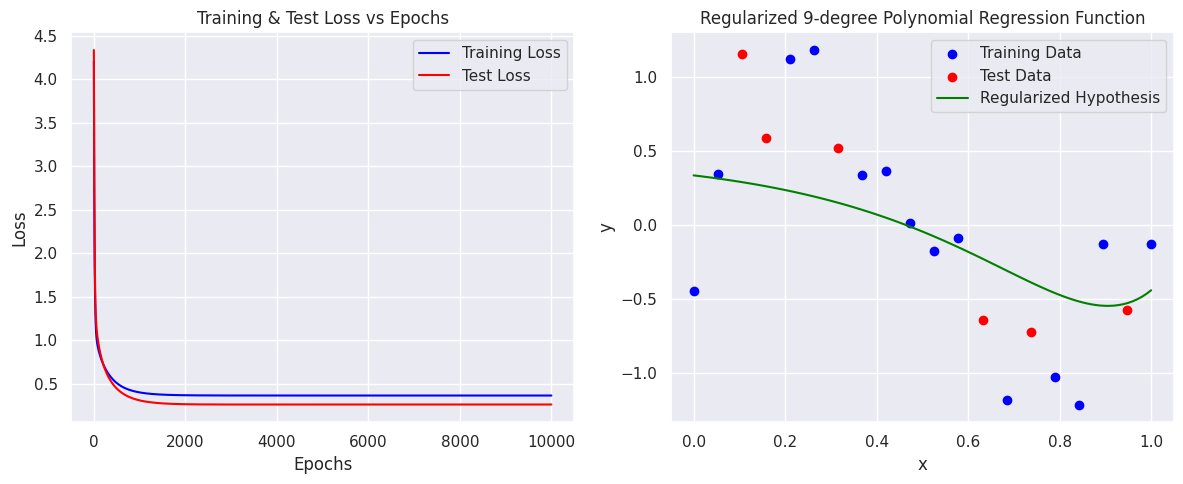

[I 2025-03-13 19:32:38,542] Trial 18 finished with value: 0.261334401202705 and parameters: {'lambda_reg': 0.05460145369783803}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.33505406 -0.36902214 -0.54122479 -0.39159596 -0.20671589 -0.04841884
  0.07559818  0.17002972  0.24112003  0.29440387]
Smallest Loss: 0.3648235944169403 loss at index 9999
Smallest Test Loss: 0.261334401202705 loss at index 3388


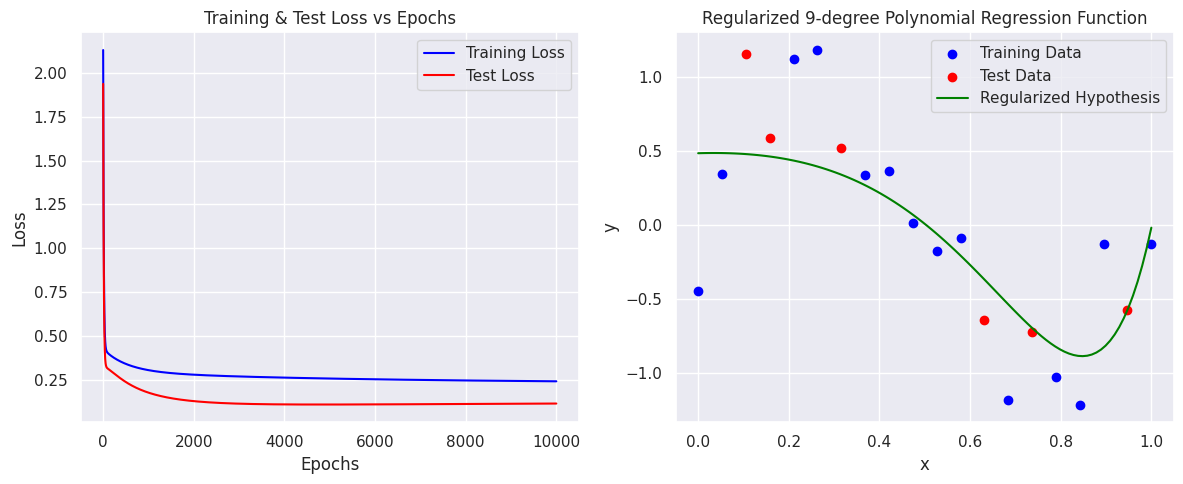

[I 2025-03-13 19:32:39,547] Trial 19 finished with value: 0.10749452723193562 and parameters: {'lambda_reg': 0.0019826596069614207}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.48467698  0.0888597  -1.22146263 -1.26488948 -1.22812364  0.1866999
  0.44230708 -0.08944731  0.86918607  1.71413735]
Smallest Loss: 0.24014213158157124 loss at index 9999
Smallest Test Loss: 0.10749452723193562 loss at index 4810


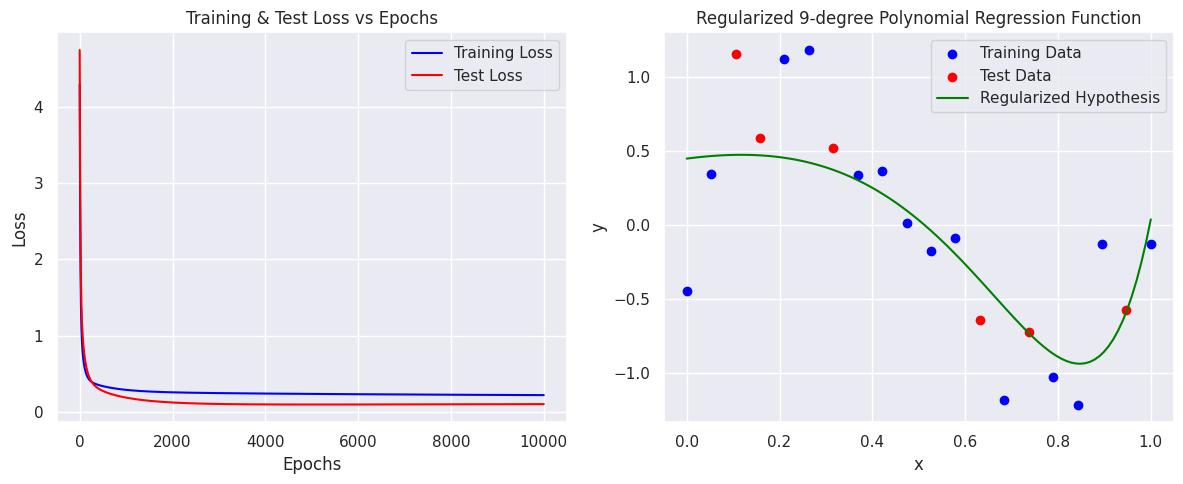

[I 2025-03-13 19:32:41,055] Trial 20 finished with value: 0.09407504055262116 and parameters: {'lambda_reg': 0.00039660470134266217}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.44832458  0.40555788 -1.35969184 -1.9234349  -0.94966749  0.26993481
  0.45403334 -0.0739851   0.52660154  2.24046398]
Smallest Loss: 0.2176877705086665 loss at index 9999
Smallest Test Loss: 0.09407504055262116 loss at index 5096


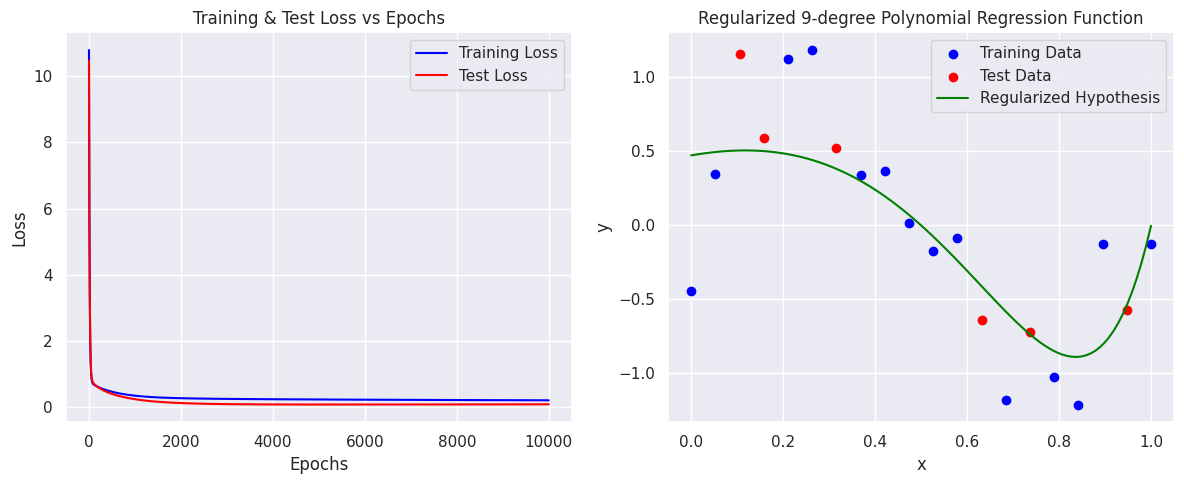

[I 2025-03-13 19:32:42,467] Trial 21 finished with value: 0.08083717159846995 and parameters: {'lambda_reg': 0.0002584991824407954}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.47008485  0.53844384 -1.91070921 -2.07220062 -0.91686564  0.58109139
  1.92336439  0.27027596 -0.2531971   1.36418684]
Smallest Loss: 0.2087820424562253 loss at index 9999
Smallest Test Loss: 0.08083717159846995 loss at index 5303


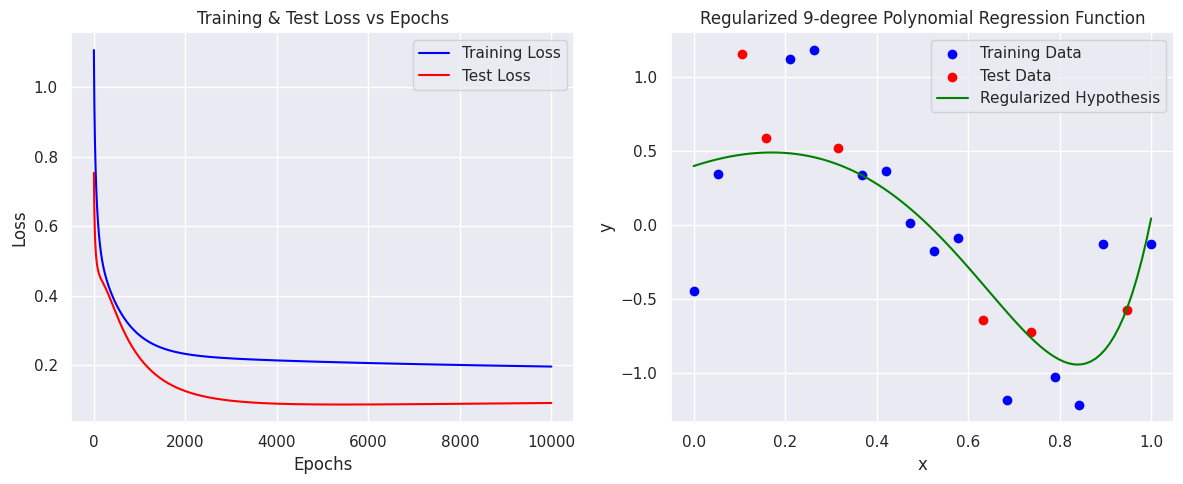

[I 2025-03-13 19:32:43,465] Trial 22 finished with value: 0.08721669682928694 and parameters: {'lambda_reg': 0.00012018489656525201}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.39778361  1.02025498 -2.50208574 -1.69565035 -1.00856436 -0.07375016
  1.39072152  0.73246357  0.76203377  1.0211353 ]
Smallest Loss: 0.1964871500601851 loss at index 9999
Smallest Test Loss: 0.08721669682928694 loss at index 5460


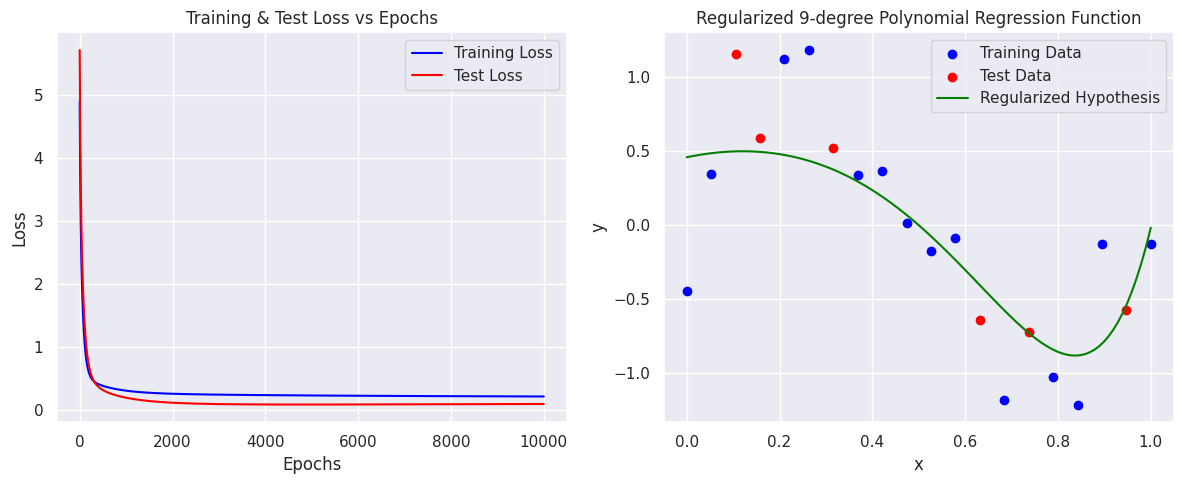

[I 2025-03-13 19:32:44,449] Trial 23 finished with value: 0.09197333819131921 and parameters: {'lambda_reg': 0.0011147451107603027}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.45736078  0.65434225 -2.49629438 -1.1086046  -0.53949702 -0.77613066
  1.24733523  1.55718331  0.50935014  0.47635381]
Smallest Loss: 0.21960160388433478 loss at index 9999
Smallest Test Loss: 0.09197333819131921 loss at index 4769


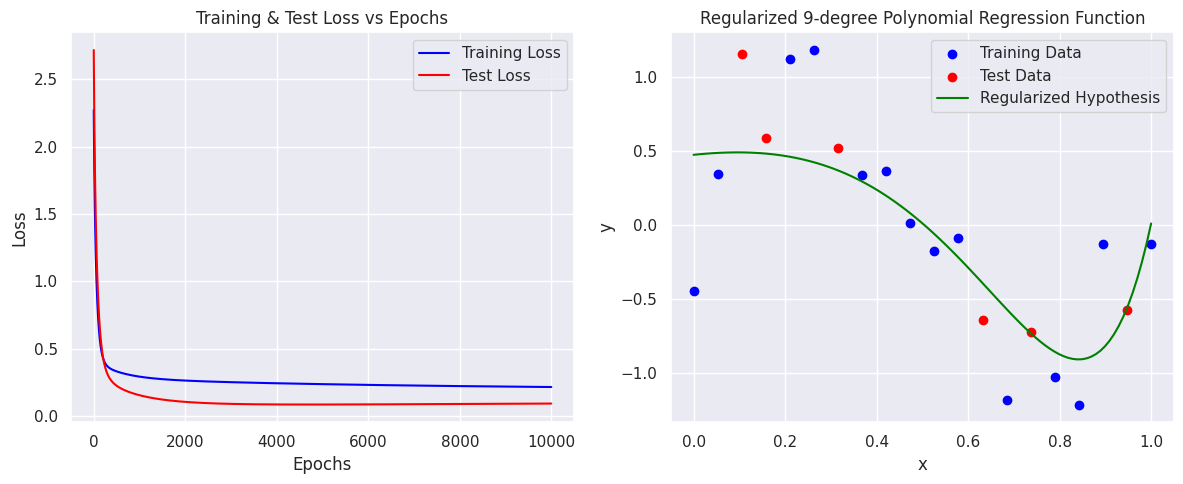

[I 2025-03-13 19:32:45,448] Trial 24 finished with value: 0.08520642533500142 and parameters: {'lambda_reg': 0.00033513022227929084}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.47385778  0.32344049 -1.38644073 -1.88848501 -1.25416781  0.46908504
  0.95264665  0.09019139  1.18567902  1.04450522]
Smallest Loss: 0.2153212844079468 loss at index 9999
Smallest Test Loss: 0.08520642533500142 loss at index 4705


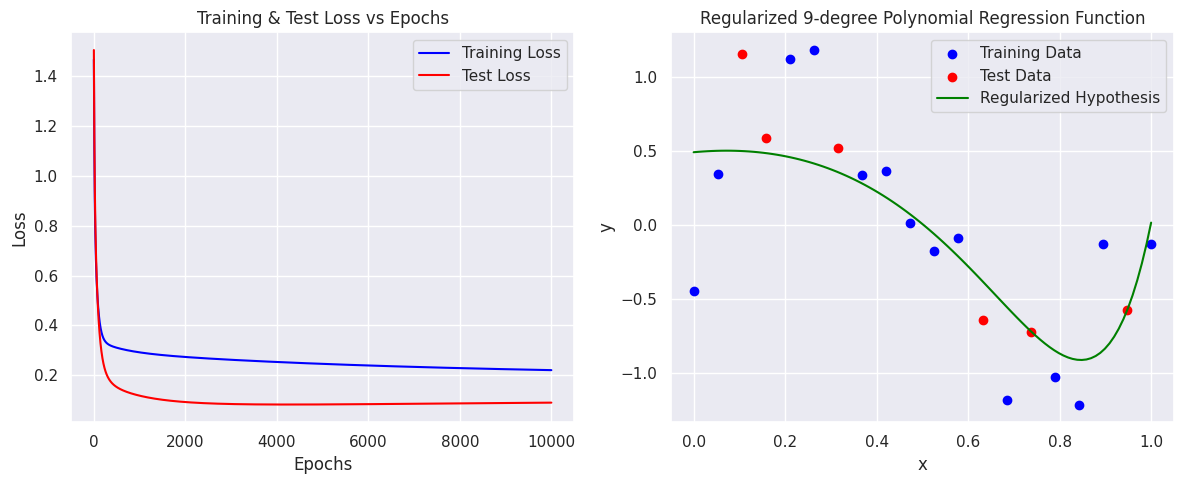

[I 2025-03-13 19:32:46,442] Trial 25 finished with value: 0.08224740044560087 and parameters: {'lambda_reg': 0.00010122980376829642}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.4913745   0.28094286 -1.78312354 -1.52763385  0.33687446 -0.16306683
 -0.58937716 -1.05122781  2.67749022  1.34386039]
Smallest Loss: 0.22033060089938666 loss at index 9999
Smallest Test Loss: 0.08224740044560087 loss at index 4255


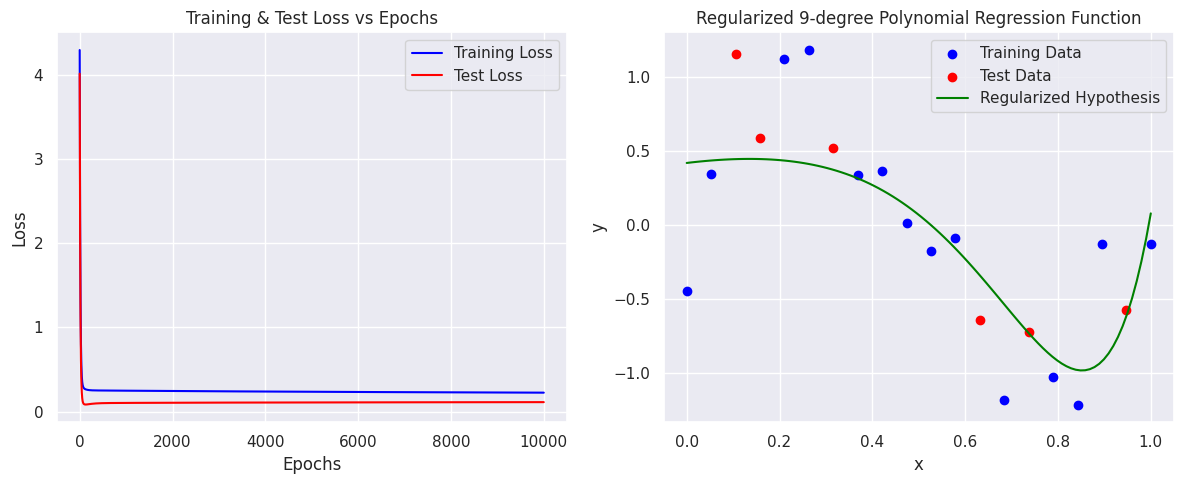

[I 2025-03-13 19:32:47,440] Trial 26 finished with value: 0.08358106234112417 and parameters: {'lambda_reg': 0.00048207286382387804}. Best is trial 14 with value: 0.07102733178874752.


Final weights: [ 0.41895755  0.37410668 -1.08351042 -1.14918372 -1.75726241 -0.97595712
  0.25491908  0.46983145  1.37762012  2.14888732]
Smallest Loss: 0.2246030044456273 loss at index 9999
Smallest Test Loss: 0.08358106234112417 loss at index 128


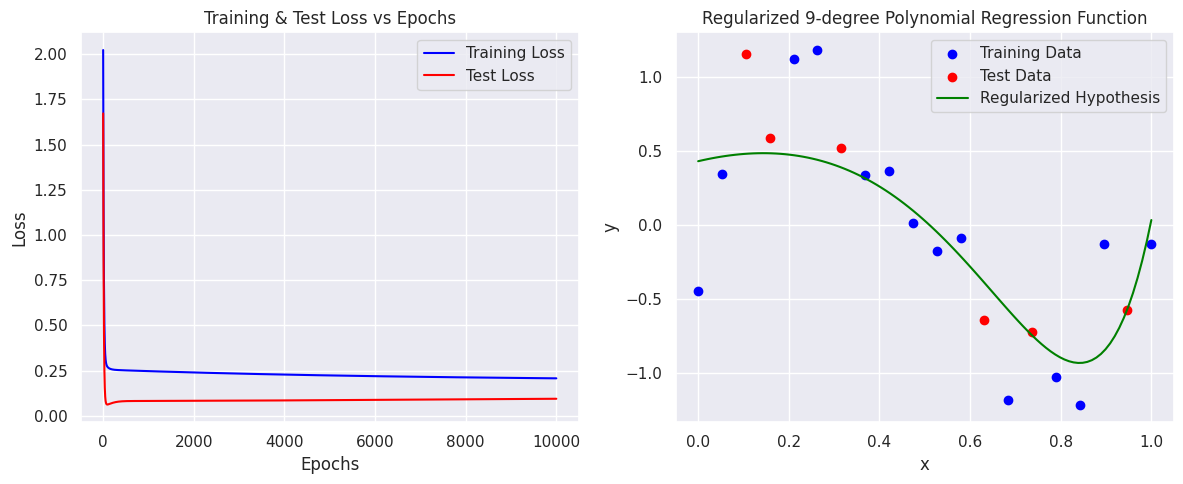

[I 2025-03-13 19:32:48,479] Trial 27 finished with value: 0.06169839566874024 and parameters: {'lambda_reg': 0.00021895535773018828}. Best is trial 27 with value: 0.06169839566874024.


Final weights: [ 0.43067621  0.71645548 -2.08283101 -1.91813582  0.26654801 -1.11087357
 -0.2166009   1.91846546  1.55446054  0.47539634]
Smallest Loss: 0.20669165295142436 loss at index 9999
Smallest Test Loss: 0.06169839566874024 loss at index 93


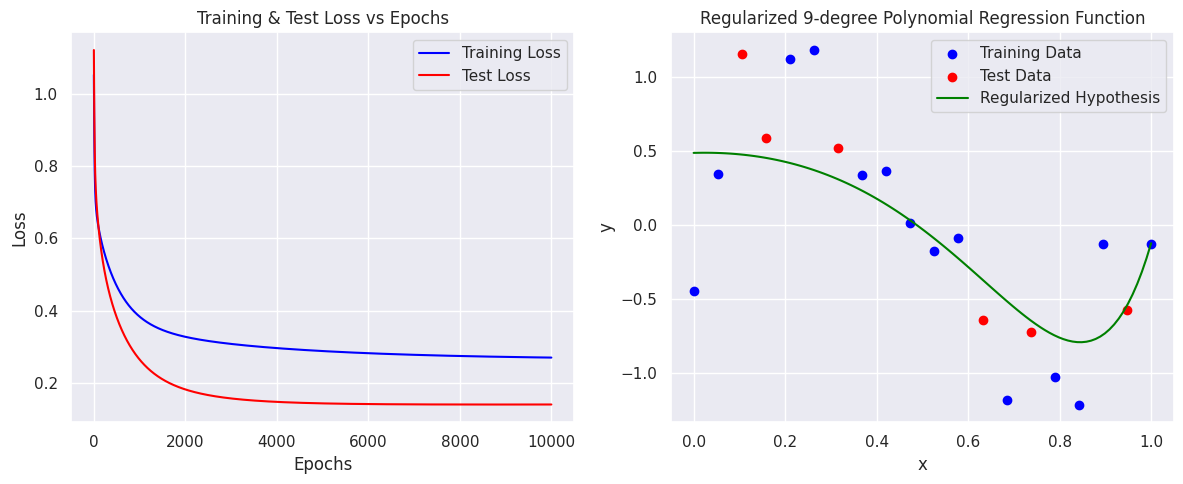

[I 2025-03-13 19:32:49,461] Trial 28 finished with value: 0.13978734056472247 and parameters: {'lambda_reg': 0.00621563601488652}. Best is trial 27 with value: 0.06169839566874024.


Final weights: [ 4.86984487e-01  8.56162516e-02 -1.73044449e+00 -1.01327377e+00
 -1.22629327e-01  1.68894490e-03 -2.47762485e-01  1.09275332e+00
  5.24540365e-01  7.99424932e-01]
Smallest Loss: 0.26981807283503023 loss at index 9999
Smallest Test Loss: 0.13978734056472247 loss at index 8760


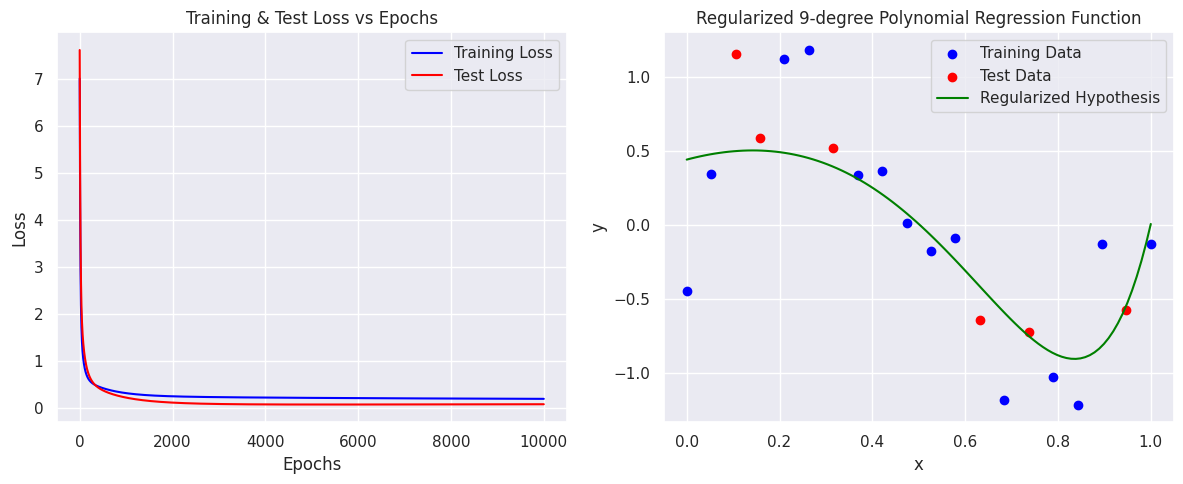

[I 2025-03-13 19:32:50,493] Trial 29 finished with value: 0.07979503612739988 and parameters: {'lambda_reg': 0.00017377913084674592}. Best is trial 27 with value: 0.06169839566874024.


Final weights: [ 0.44155107  0.83161577 -2.52779689 -1.73871998 -0.69226012  0.61391812
  0.67554907  0.9770037   0.89694039  0.52922178]
Smallest Loss: 0.2004196213125081 loss at index 9999
Smallest Test Loss: 0.07979503612739988 loss at index 5287


[I 2025-03-13 19:32:51,482] Trial 30 finished with value: 0.4485978392051969 and parameters: {'lambda_reg': 0.7502805769922352}. Best is trial 27 with value: 0.06169839566874024.


Final weights: [ 0.0349612  -0.09250806 -0.10282259 -0.08365591 -0.0620145  -0.04347653
 -0.0286352  -0.01698149 -0.0078673  -0.00072892]
Smallest Loss: 0.46362518936048225 loss at index 1871
Smallest Test Loss: 0.4485978392051969 loss at index 2186


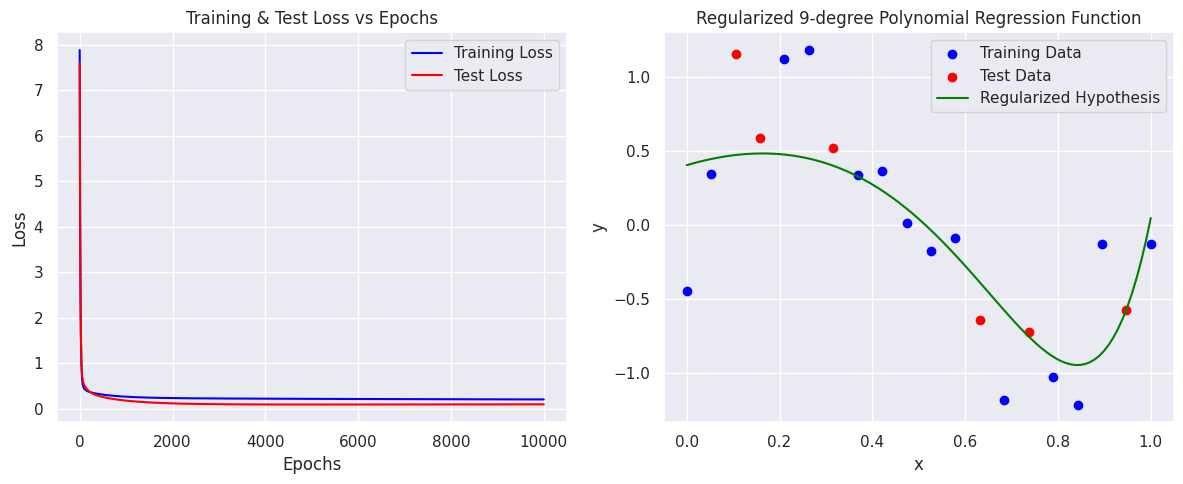

[I 2025-03-13 19:32:52,999] Trial 31 finished with value: 0.0905629901971038 and parameters: {'lambda_reg': 0.0002424754685390164}. Best is trial 27 with value: 0.06169839566874024.


Final weights: [ 0.40382558  0.9281214  -2.46159818 -1.42617007 -0.43350783 -1.08094479
  0.68303303  1.10040995  1.77727311  0.55638664]
Smallest Loss: 0.20260021256581176 loss at index 9999
Smallest Test Loss: 0.0905629901971038 loss at index 5089


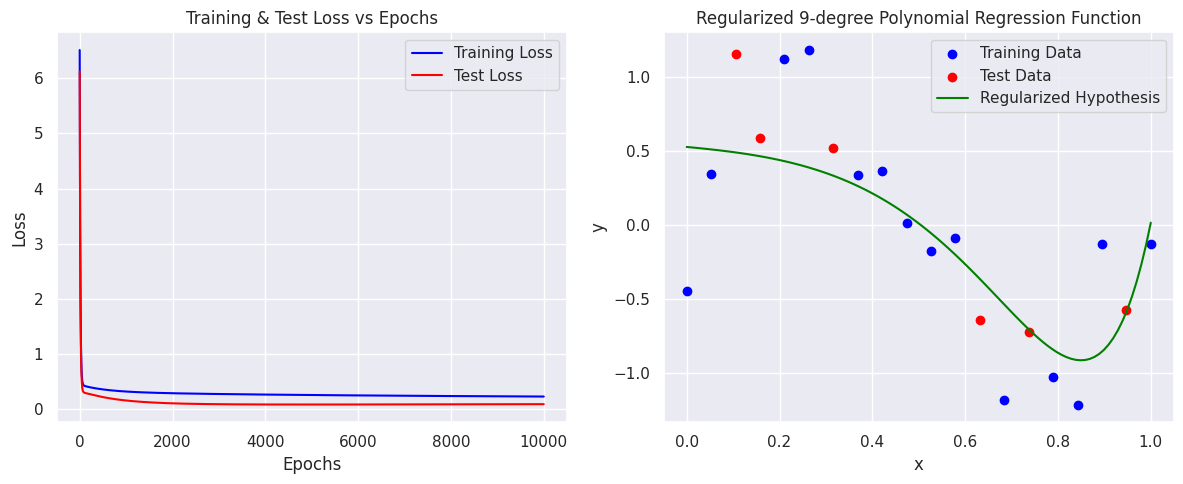

[I 2025-03-13 19:32:54,395] Trial 32 finished with value: 0.0894206454290033 and parameters: {'lambda_reg': 0.00019604269995510479}. Best is trial 27 with value: 0.06169839566874024.


Final weights: [ 0.52706276 -0.29491992 -0.31800082 -1.99305627 -0.48878829 -0.48957885
 -0.32743527  0.25473611  1.21199842  1.93374345]
Smallest Loss: 0.234040327003012 loss at index 9999
Smallest Test Loss: 0.0894206454290033 loss at index 4878


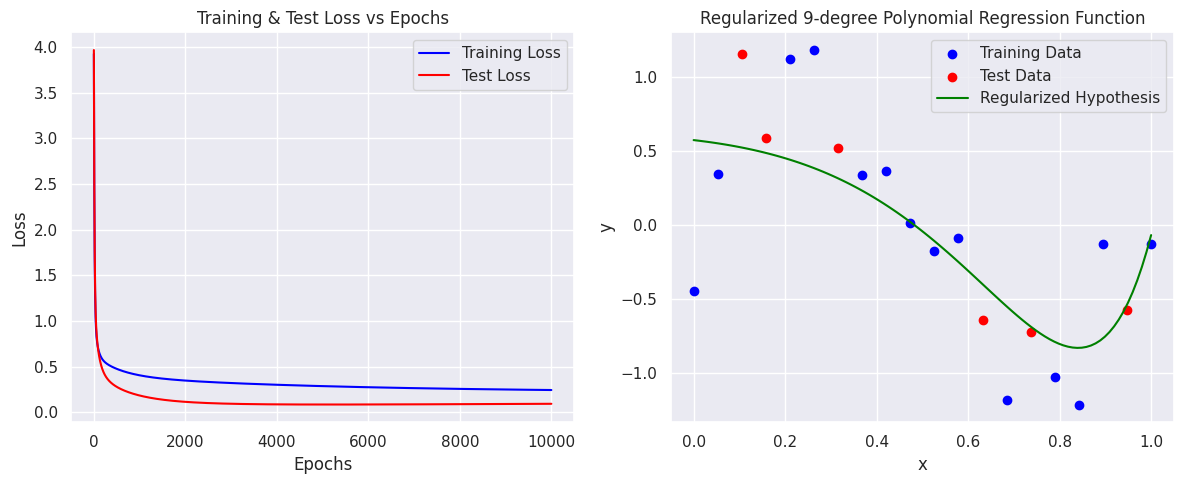

[I 2025-03-13 19:32:55,405] Trial 33 finished with value: 0.08575912172185739 and parameters: {'lambda_reg': 0.0012796957013774418}. Best is trial 27 with value: 0.06169839566874024.


Final weights: [ 0.5733057  -0.35769788 -0.98371987 -1.34213026 -0.41441611 -0.70488642
  0.77390306  1.34142634  0.0640631   0.98206206]
Smallest Loss: 0.24457133851128715 loss at index 9999
Smallest Test Loss: 0.08575912172185739 loss at index 5133


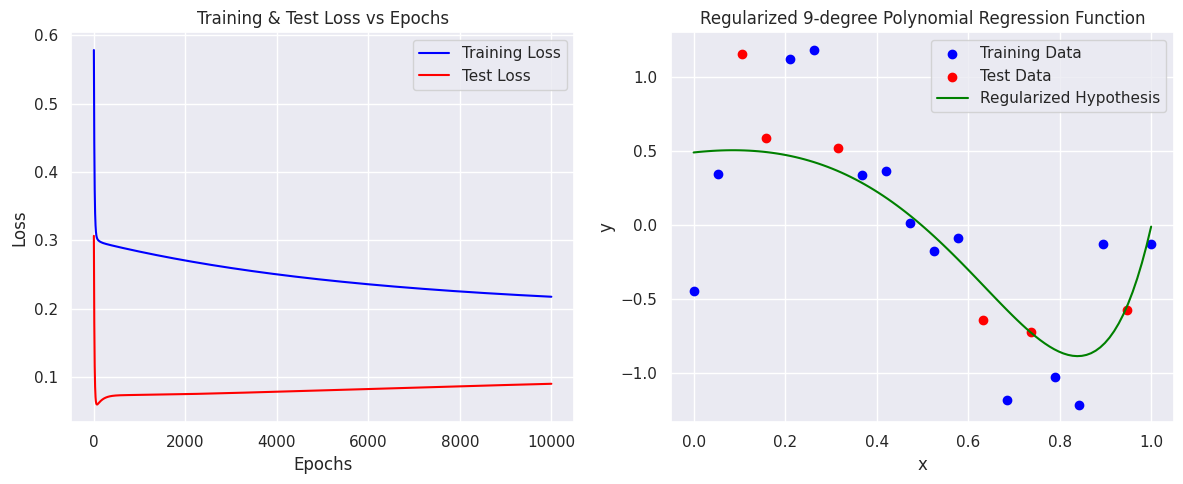

[I 2025-03-13 19:32:56,414] Trial 34 finished with value: 0.059897010540362304 and parameters: {'lambda_reg': 0.00045344463531533187}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.48974745  0.3347622  -1.69573395 -1.80236381 -1.01007312  1.24061065
  0.23972585 -0.10143404  1.52808766  0.7655074 ]
Smallest Loss: 0.21753757243658037 loss at index 9999
Smallest Test Loss: 0.059897010540362304 loss at index 68


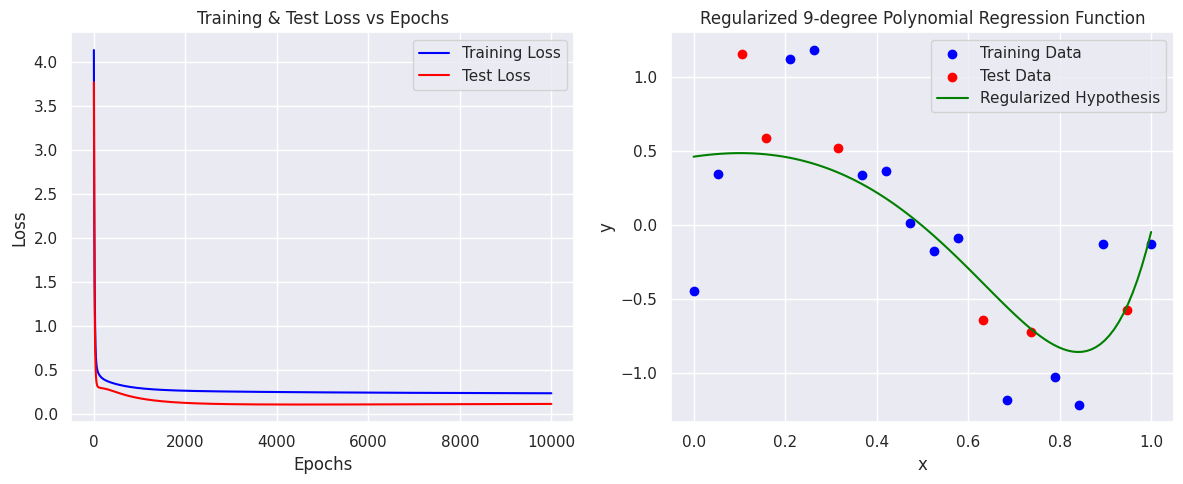

[I 2025-03-13 19:32:57,436] Trial 35 finished with value: 0.11283171131028283 and parameters: {'lambda_reg': 0.0027136948530580144}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.46128758  0.45386637 -1.94632103 -1.82262734 -0.06275685  0.32479942
  0.50154433 -0.12906936  1.47502741  0.697098  ]
Smallest Loss: 0.2406112338120923 loss at index 9999
Smallest Test Loss: 0.11283171131028283 loss at index 4545


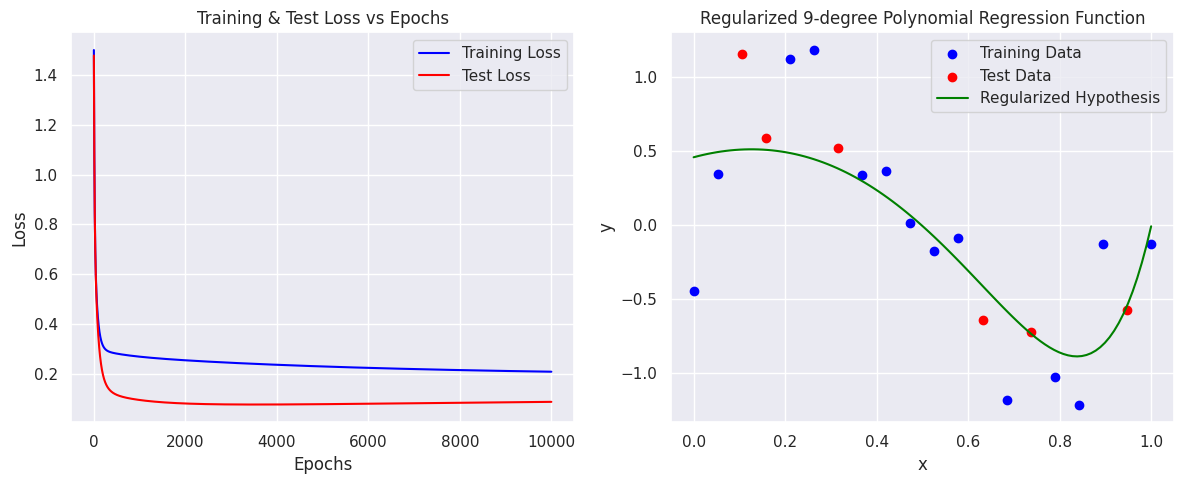

[I 2025-03-13 19:32:58,444] Trial 36 finished with value: 0.07779650985765543 and parameters: {'lambda_reg': 0.0004958413621580422}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.45735326  0.83795771 -3.16031487 -0.7824588  -0.28009192  0.32506105
  0.17814794  0.58641023  0.81475729  1.01422074]
Smallest Loss: 0.20938605842726707 loss at index 9999
Smallest Test Loss: 0.07779650985765543 loss at index 3531


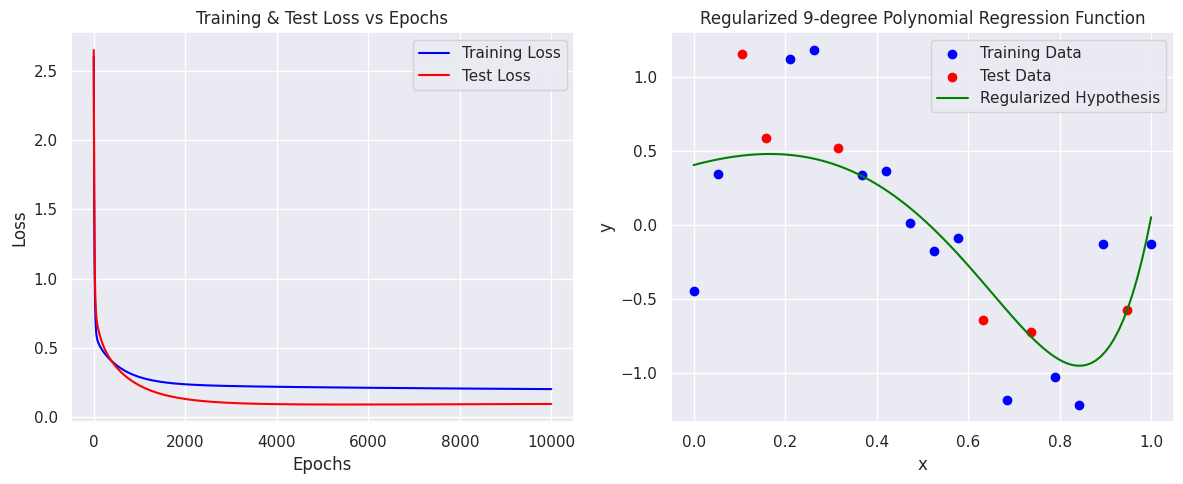

[I 2025-03-13 19:32:59,461] Trial 37 finished with value: 0.09168462776980232 and parameters: {'lambda_reg': 0.00016396657547074325}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.40482394  0.81559771 -1.70652323 -3.05144634  0.37880977  0.1397963
 -0.09235257  0.69413735  0.97899148  1.49061471]
Smallest Loss: 0.20290152862540126 loss at index 9999
Smallest Test Loss: 0.09168462776980232 loss at index 5542


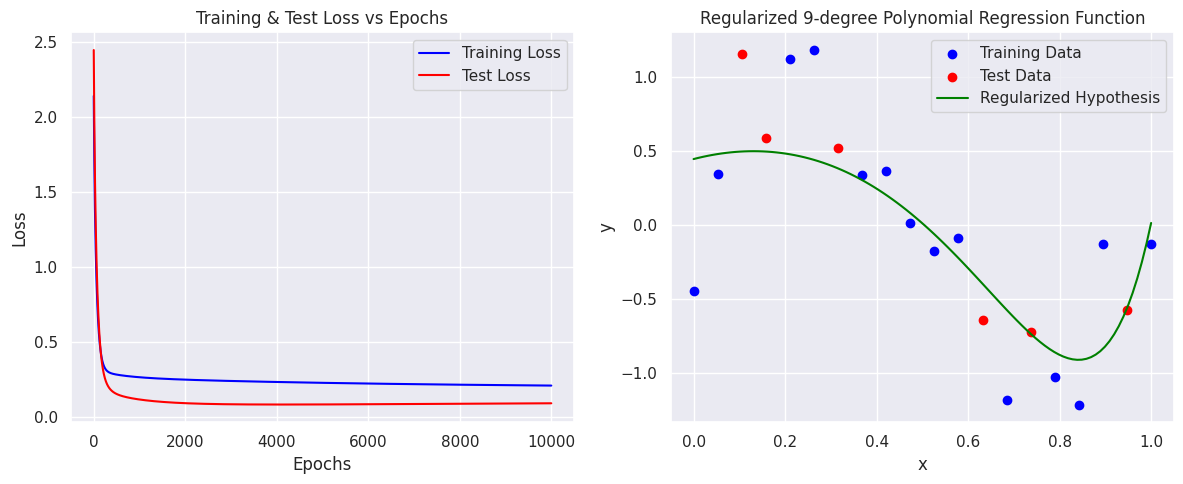

[I 2025-03-13 19:33:00,513] Trial 38 finished with value: 0.08313737128979322 and parameters: {'lambda_reg': 0.00037280346205594467}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.44523195  0.79774906 -2.90339766 -0.62969225 -0.46106499 -0.69025357
  0.56426293  1.2955895   0.03967516  1.55574249]
Smallest Loss: 0.20952549786643934 loss at index 9999
Smallest Test Loss: 0.08313737128979322 loss at index 4096


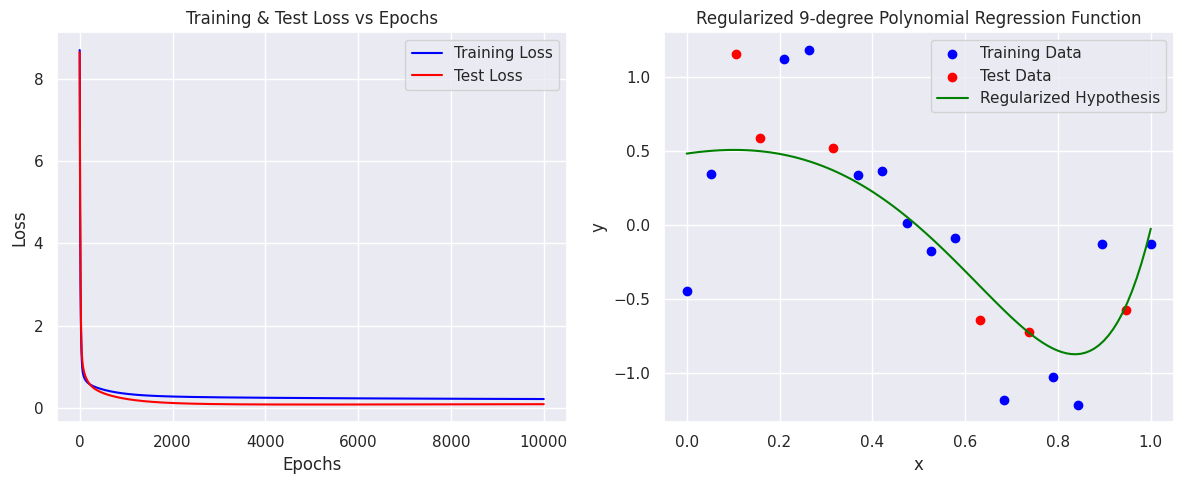

[I 2025-03-13 19:33:01,565] Trial 39 finished with value: 0.08441703195776644 and parameters: {'lambda_reg': 0.0007757948249722554}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.48203298  0.46122821 -1.88448164 -2.40398634  0.11505747  0.79658594
  0.46766076  0.12953325  1.0701038   0.74127662]
Smallest Loss: 0.21794834994794193 loss at index 9999
Smallest Test Loss: 0.08441703195776644 loss at index 5002


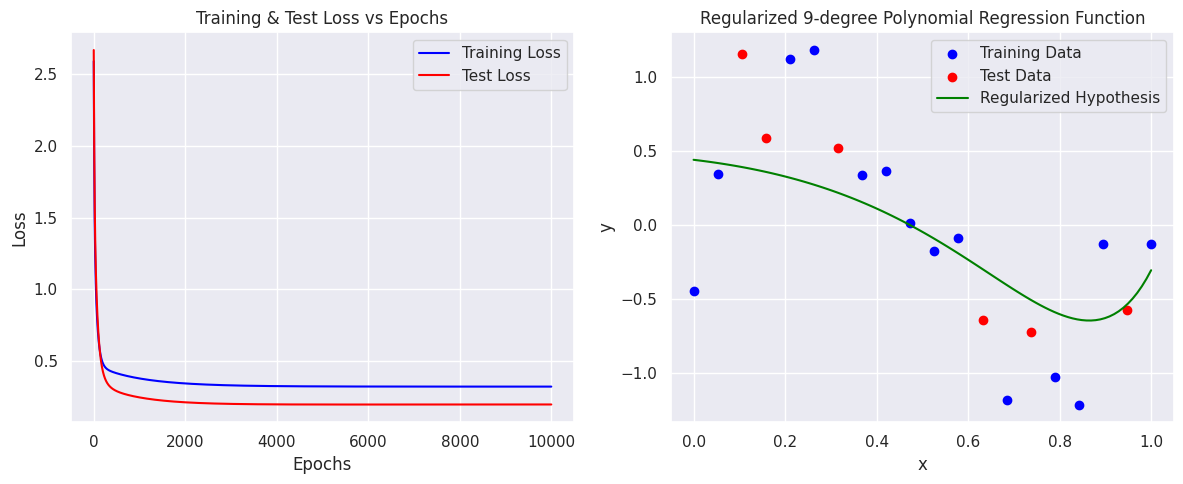

[I 2025-03-13 19:33:02,666] Trial 40 finished with value: 0.19617572216724127 and parameters: {'lambda_reg': 0.022958620741311813}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.44029242 -0.36630867 -0.84888917 -0.62110028 -0.32653857 -0.03558213
  0.18440513  0.31941251  0.43429121  0.51465542]
Smallest Loss: 0.3211865873594286 loss at index 9999
Smallest Test Loss: 0.19617572216724127 loss at index 5714


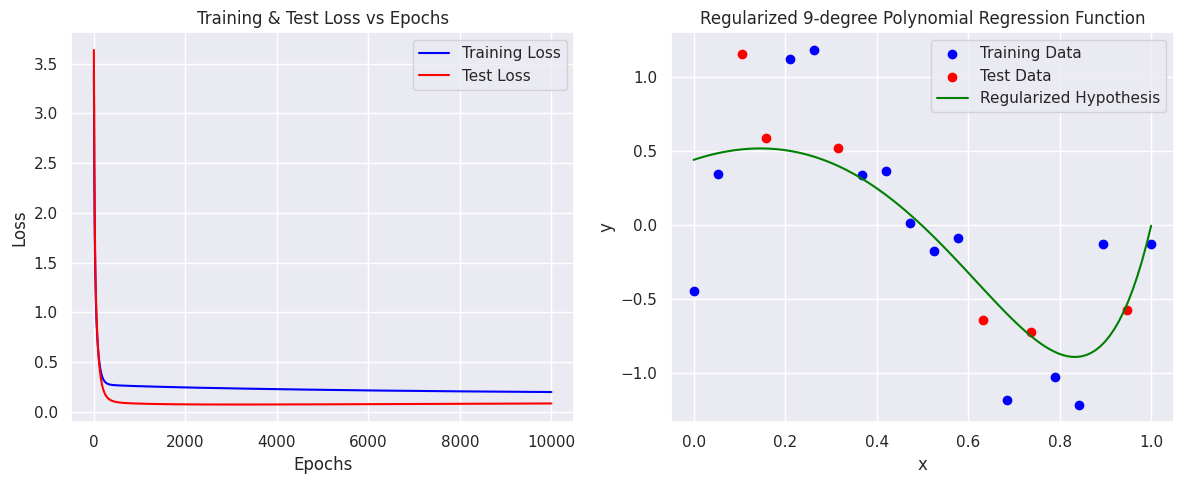

[I 2025-03-13 19:33:03,810] Trial 41 finished with value: 0.07260770011418158 and parameters: {'lambda_reg': 0.000196506371407958}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.43987304  1.0182327  -3.08488453 -1.96585477  0.45229965  0.21744424
  1.40140218  0.46083413 -0.19585327  1.25140636]
Smallest Loss: 0.19818797077381295 loss at index 9999
Smallest Test Loss: 0.07260770011418158 loss at index 3084


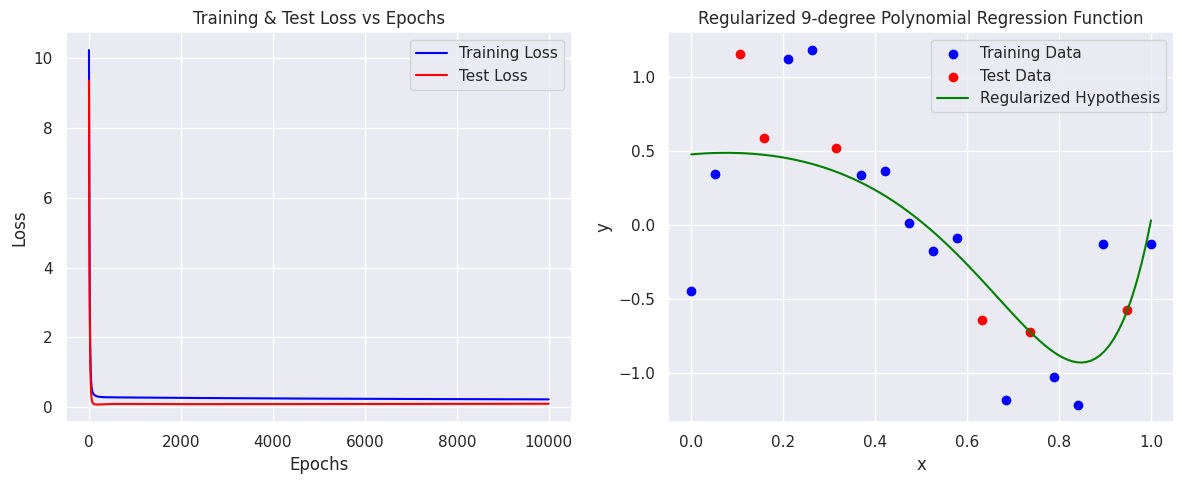

[I 2025-03-13 19:33:05,133] Trial 42 finished with value: 0.07358176939248498 and parameters: {'lambda_reg': 0.00016956983050648848}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.47680098  0.27386496 -1.72435119 -0.62106066 -0.916587   -1.70577922
  0.93409449  1.37597587 -0.43870366  2.37699606]
Smallest Loss: 0.22144962770541768 loss at index 9999
Smallest Test Loss: 0.07358176939248498 loss at index 176


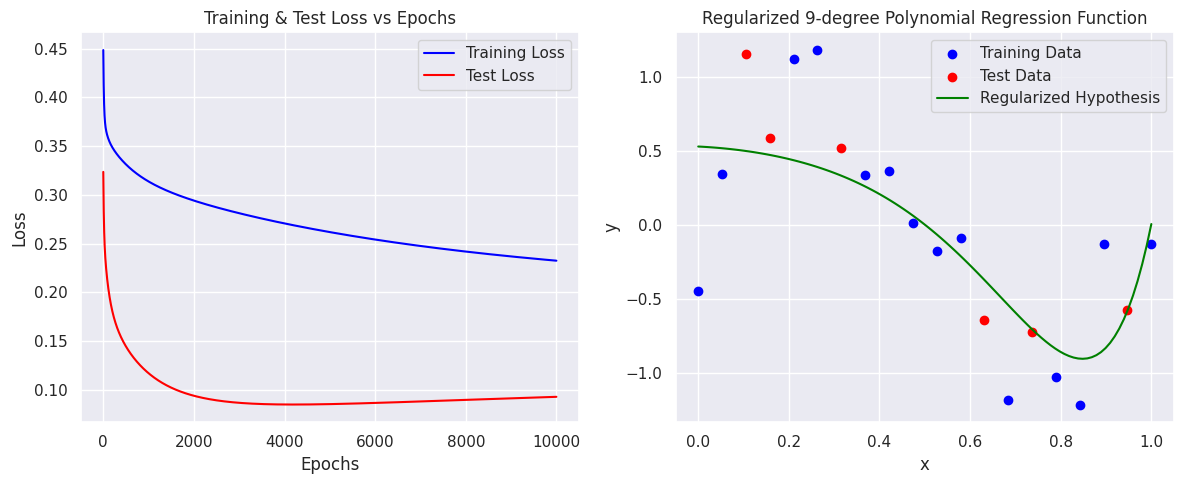

[I 2025-03-13 19:33:06,661] Trial 43 finished with value: 0.084834882489149 and parameters: {'lambda_reg': 0.00018902910819270751}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.52993159 -0.15444984 -1.20442815 -0.35465163 -1.5507234  -0.39953604
 -0.80584789  1.11544401  1.55213853  1.27869906]
Smallest Loss: 0.23241093663162085 loss at index 9999
Smallest Test Loss: 0.084834882489149 loss at index 4192


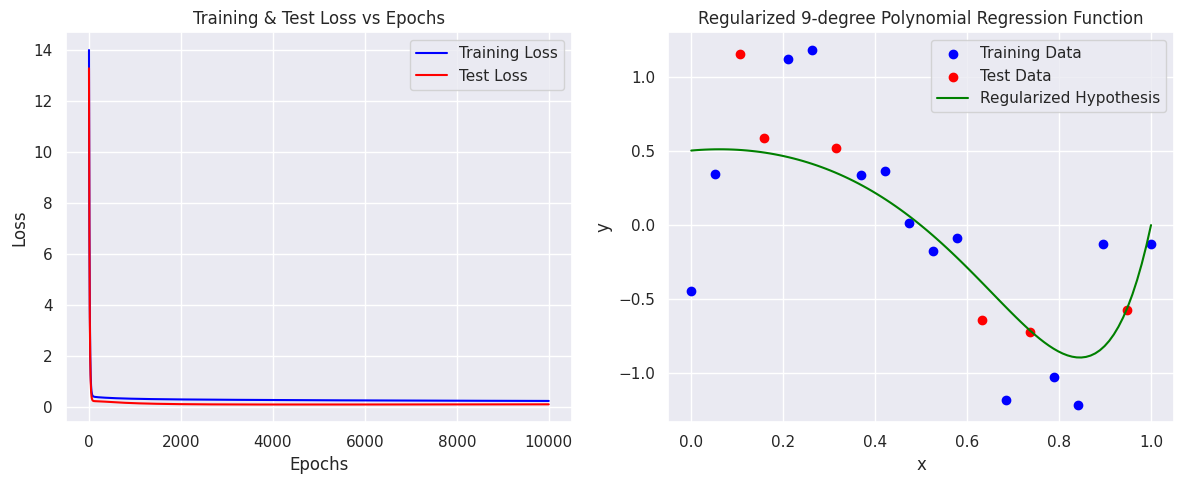

[I 2025-03-13 19:33:07,701] Trial 44 finished with value: 0.08138888580174966 and parameters: {'lambda_reg': 0.00030041376158791846}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.50270134  0.27363891 -2.15627401 -0.56976079 -0.33872541 -0.66420344
 -0.05199846  0.2448813   1.26431044  1.49488833]
Smallest Loss: 0.22257216316695888 loss at index 9999
Smallest Test Loss: 0.08138888580174966 loss at index 4507


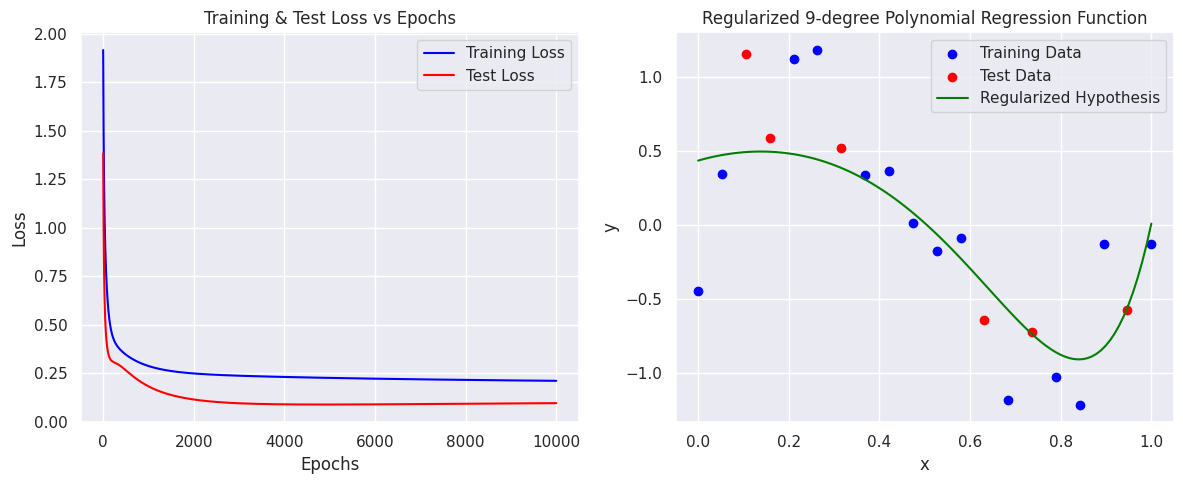

[I 2025-03-13 19:33:08,743] Trial 45 finished with value: 0.08936887125503058 and parameters: {'lambda_reg': 0.000642813344809355}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.43511648  0.8700799  -3.03978915 -0.3054827  -1.18089445 -0.45736659
  1.06673875  1.08063981  0.43612418  1.10407976]
Smallest Loss: 0.21148031432082032 loss at index 9999
Smallest Test Loss: 0.08936887125503058 loss at index 4847


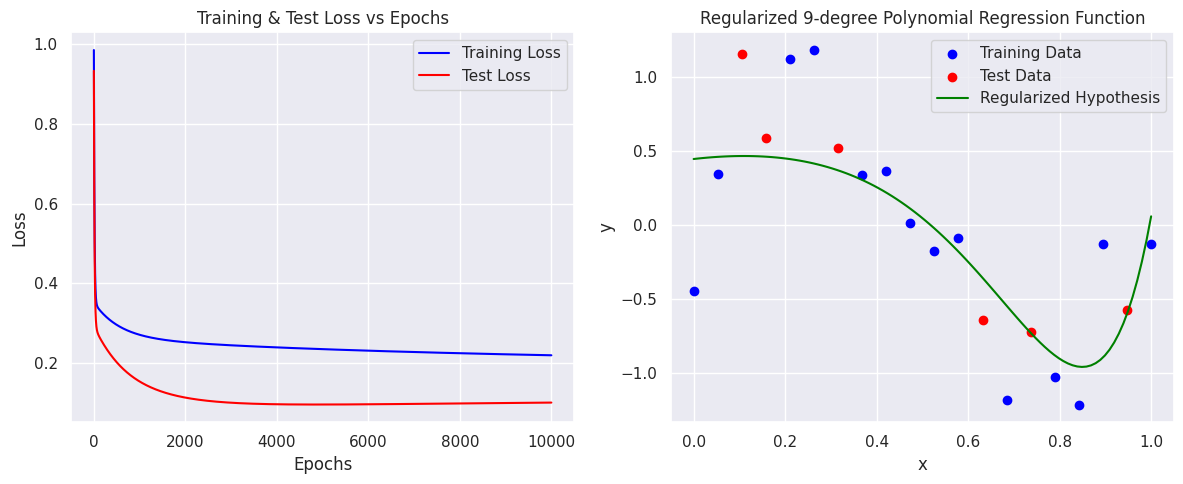

[I 2025-03-13 19:33:09,781] Trial 46 finished with value: 0.09589570240455969 and parameters: {'lambda_reg': 0.0001730644956951915}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.44562705  0.3517184  -1.39268391 -1.06660355 -1.32907001 -0.92654928
  0.76790985 -0.74596495  2.37105784  1.58301099]
Smallest Loss: 0.2195574896760002 loss at index 9999
Smallest Test Loss: 0.09589570240455969 loss at index 4864


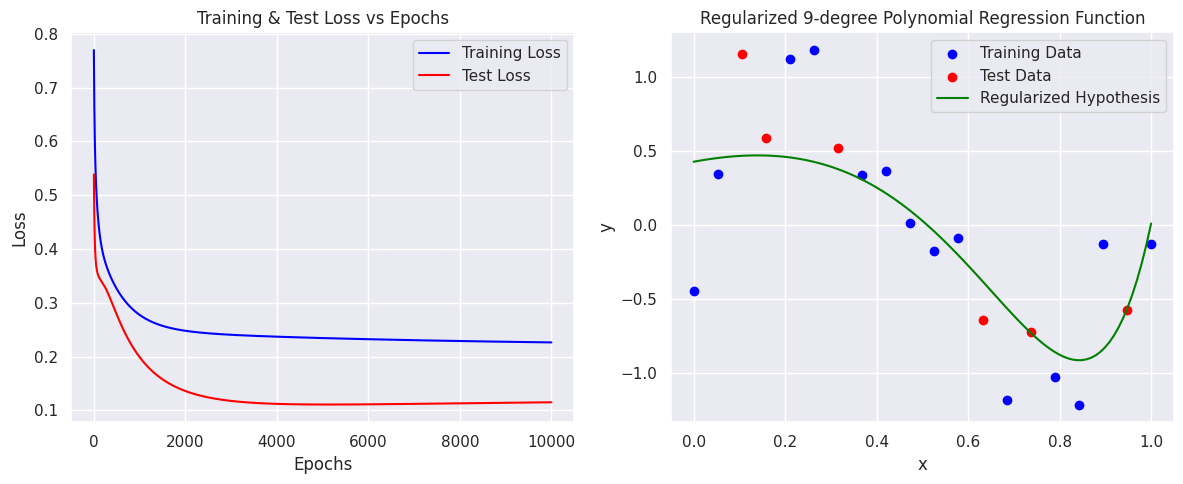

[I 2025-03-13 19:33:10,810] Trial 47 finished with value: 0.111080641974265 and parameters: {'lambda_reg': 0.001502995367214972}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.42708411  0.57294606 -1.61560502 -1.8562746  -1.58708111  1.23604861
 -0.05700212  0.6998546   1.24773925  0.94253629]
Smallest Loss: 0.22650708670503478 loss at index 9999
Smallest Test Loss: 0.111080641974265 loss at index 5125


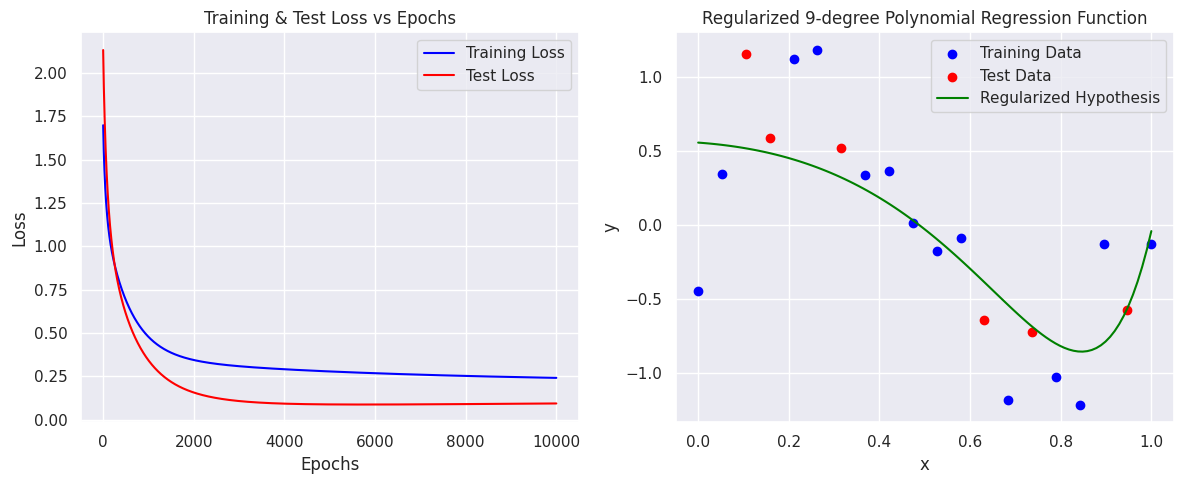

[I 2025-03-13 19:33:11,856] Trial 48 finished with value: 0.08773590257874009 and parameters: {'lambda_reg': 0.0009308906148360861}. Best is trial 34 with value: 0.059897010540362304.


Final weights: [ 0.55639542 -0.22357943 -1.22575686 -1.33589809 -0.09934856  0.06796945
 -0.02469813 -0.17046877  0.27912026  2.135063  ]
Smallest Loss: 0.24153763037527837 loss at index 9999
Smallest Test Loss: 0.08773590257874009 loss at index 5741


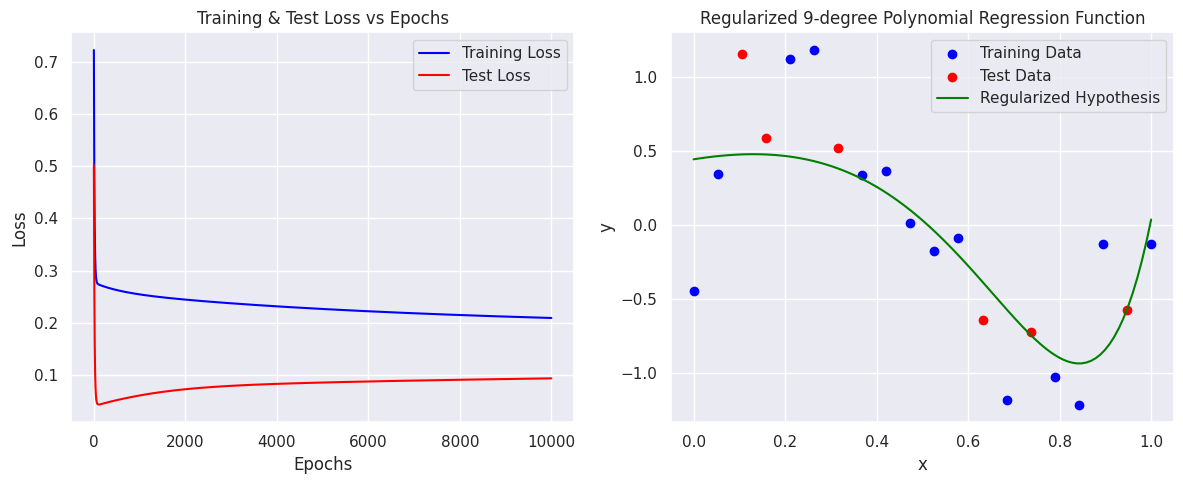

[I 2025-03-13 19:33:12,866] Trial 49 finished with value: 0.04381193445329344 and parameters: {'lambda_reg': 0.00014483578169344937}. Best is trial 49 with value: 0.04381193445329344.


Final weights: [ 0.44350261  0.49206514 -1.4554881  -2.09779904 -0.40743418 -1.14432363
  0.86523704  1.07044651  1.70392452  0.56653462]
Smallest Loss: 0.20945184122278354 loss at index 9999
Smallest Test Loss: 0.04381193445329344 loss at index 108
Best lambda_reg: 0.00014483578169344937
Best test loss: 0.04381193445329344
Best lambda_reg: 0.00014483578169344937
Best test loss: 0.04381193445329344


<ipython-input-16-67da4ea38305>:19: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


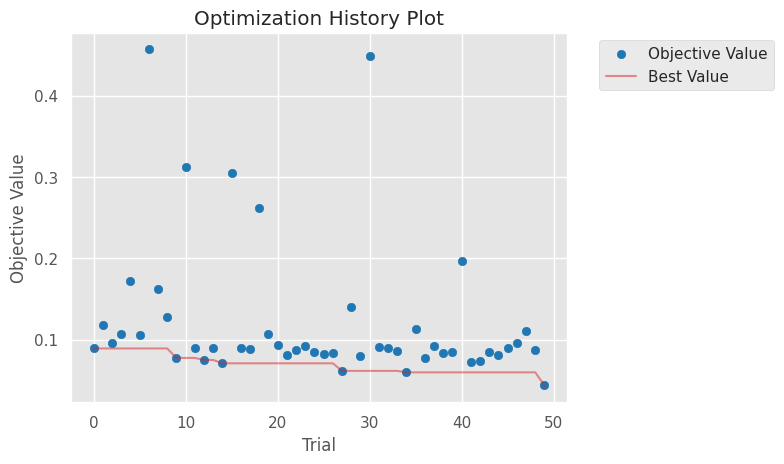

In [16]:
# Set direction to "minimize" as we want to minimize the objective
study = optuna.create_study(direction="minimize")

n_trials = 50

study.optimize(objective, n_trials=50)  # Run the optimization for 100 trials

# Best lambda_reg
best_lambda_reg = study.best_params["lambda_reg"]
print(f"Best lambda_reg: {best_lambda_reg}")
print(f"Best test loss: {study.best_value}")

# Best Batch size
best_lambda_reg = study.best_params["lambda_reg"]
print(f"Best lambda_reg: {best_lambda_reg}")
print(f"Best test loss: {study.best_value}")

# Plot optimization history
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()
